# Lending Club Loan Data Analysis - Neural Network

* Description: 

  LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer   lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on   a secondary market. LendingClub is the world's largest peer-to-peer lending platform.
  
  
* Our Goal: 

  Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build   a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential   customer we can assess whether or not they are likely to pay back the loan. The "loan_status" column contains our label.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is AC64-25E6

 Directory of C:\Users\Paresh\OneDrive\Documents\EXCELR_AI\ANN_mini_project

05-02-2023  23:08    <DIR>          .
21-01-2023  09:45    <DIR>          ..
04-02-2023  15:11    <DIR>          .ipynb_checkpoints
25-01-2023  17:40     1,675,133,810 accepted_2007_to_2018Q4.csv
21-01-2023  07:36       392,582,231 accepted_2007_to_2018Q4.csv.gz
04-02-2023  22:09         2,100,686 ANN_mini_project_basic_version.ipynb
05-02-2023  23:08         2,283,305 ANN_mini_project_feature_selection_random_forest.ipynb
21-01-2023  07:13            10,244 DS_Store (1)
05-02-2023  22:57            41,736 image.jpg
04-02-2023  17:17           368,896 LoanData_model1.h5
               7 File(s)  2,072,520,908 bytes
               3 Dir(s)  236,821,782,528 bytes free


In [6]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')

In [7]:
df.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
947696,107325611,NaN,13350.0,13350.0,13350.0,60 months,16.99,331.72,D,D1,Business Analyst,3 years,MORTGAGE,80000.0,Verified,May-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,841xx,UT,15.20,4.0,Feb-2006,675.0,679.0,1.0,NaN,78.0,15.0,1.0,9970.0,46.0,19.0,w,0.00,0.00,14923.192295,14923.19,13350.00,1573.19,0.0,0.0,0.0,Jan-2018,12613.75,NaN,Sep-2018,714.0,710.0,2.0,12.0,1.0,Individual,NaN,NaN,NaN,0.0,188.0,39233.0,3.0,4.0,2.0,2.0,5.0,29263.0,78.0,4.0,4.0,2746.0,46.0,21690.0,1.0,2.0,1.0,6.0,2615.0,2767.0,47.0,0.0,0.0,134.0,115.0,1.0,1.0,0.0,1.0,NaN,5.0,NaN,2.0,6.0,11.0,6.0,6.0,5.0,11.0,14.0,9.0,15.0,NaN,0.0,4.0,6.0,89.0,16.7,0.0,0.0,59066.0,39233.0,16600.0,37376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1786549,7627811,NaN,6500.0,6500.0,6500.0,36 months,19.52,239.98,D,D4,technition,10+ years,OWN,51000.0,Not Verified,Oct-2013,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 10/09/13 > This loan is to...,debt_consolidation,debt consolidation,604xx,IL,25.91,0.0,Aug-2000,670.0,674.0,2.0,NaN,NaN,14.0,0.0,22544.0,85.7,28.0,w,0.00,0.00,8650.142960,8650.14,6500.00,2150.14,0.0,0.0,0.0,Oct-2016,239.81,NaN,Mar-2018,659.0,655.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,26093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26300.0,NaN,NaN,NaN,3.0,1864.0,2533.0,88.1,0.0,0.0,160.0,123.0,5.0,5.0,0.0,5.0,NaN,4.0,NaN,0.0,10.0,13.0,10.0,18.0,1.0,13.0,21.0,13.0,14.0,0.0,0.0,0.0,3.0,Na

In [8]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [9]:
df["loan_status"].value_counts()                       # class 1 - fully paid
                                                       # class 2 - merge charged off, late and default

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [10]:
df.shape

(2260701, 151)

In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

In [12]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In [13]:
# Checking nummber of missing values in each feature
for feature in df.columns:
    print("Feature: ",feature,"-",df[feature].isnull().sum())
    print("=====================================")

Feature:  id - 0
Feature:  member_id - 2260701
Feature:  loan_amnt - 33
Feature:  funded_amnt - 33
Feature:  funded_amnt_inv - 33
Feature:  term - 33
Feature:  int_rate - 33
Feature:  installment - 33
Feature:  grade - 33
Feature:  sub_grade - 33
Feature:  emp_title - 167002
Feature:  emp_length - 146940
Feature:  home_ownership - 33
Feature:  annual_inc - 37
Feature:  verification_status - 33
Feature:  issue_d - 33
Feature:  loan_status - 33
Feature:  pymnt_plan - 33
Feature:  url - 33
Feature:  desc - 2134634
Feature:  purpose - 33
Feature:  title - 23358
Feature:  zip_code - 34
Feature:  addr_state - 33
Feature:  dti - 1744
Feature:  delinq_2yrs - 62
Feature:  earliest_cr_line - 62
Feature:  fico_range_low - 33
Feature:  fico_range_high - 33
Feature:  inq_last_6mths - 63
Feature:  mths_since_last_delinq - 1158535
Feature:  mths_since_last_record - 1901545
Feature:  open_acc - 62
Feature:  pub_rec - 62
Feature:  revol_bal - 33
Feature:  revol_util - 1835
Feature:  total_acc - 62
Feat

Feature:  sec_app_earliest_cr_line - 2152680
Feature:  sec_app_inq_last_6mths - 2152680
Feature:  sec_app_mort_acc - 2152680
Feature:  sec_app_open_acc - 2152680
Feature:  sec_app_revol_util - 2154517
Feature:  sec_app_open_act_il - 2152680
Feature:  sec_app_num_rev_accts - 2152680
Feature:  sec_app_chargeoff_within_12_mths - 2152680
Feature:  sec_app_collections_12_mths_ex_med - 2152680
Feature:  sec_app_mths_since_last_major_derog - 2224759
Feature:  hardship_flag - 33
Feature:  hardship_type - 2249784
Feature:  hardship_reason - 2249784
Feature:  hardship_status - 2249784
Feature:  deferral_term - 2249784
Feature:  hardship_amount - 2249784
Feature:  hardship_start_date - 2249784
Feature:  hardship_end_date - 2249784
Feature:  payment_plan_start_date - 2249784
Feature:  hardship_length - 2249784
Feature:  hardship_dpd - 2249784
Feature:  hardship_loan_status - 2249784
Feature:  orig_projected_additional_accrued_interest - 2252050
Feature:  hardship_payoff_balance_amount - 2249784
Fe

In [14]:
# Percent of missing values in each features
for feature in df.columns:
    print("Feature: ",feature,"-",np.round(df[feature].isnull().mean()*100,3))
    print("=====================================")

Feature:  id - 0.0
Feature:  member_id - 100.0
Feature:  loan_amnt - 0.001
Feature:  funded_amnt - 0.001
Feature:  funded_amnt_inv - 0.001
Feature:  term - 0.001
Feature:  int_rate - 0.001
Feature:  installment - 0.001
Feature:  grade - 0.001
Feature:  sub_grade - 0.001
Feature:  emp_title - 7.387
Feature:  emp_length - 6.5
Feature:  home_ownership - 0.001
Feature:  annual_inc - 0.002
Feature:  verification_status - 0.001
Feature:  issue_d - 0.001
Feature:  loan_status - 0.001
Feature:  pymnt_plan - 0.001
Feature:  url - 0.001
Feature:  desc - 94.424
Feature:  purpose - 0.001
Feature:  title - 1.033
Feature:  zip_code - 0.002
Feature:  addr_state - 0.001
Feature:  dti - 0.077
Feature:  delinq_2yrs - 0.003
Feature:  earliest_cr_line - 0.003
Feature:  fico_range_low - 0.001
Feature:  fico_range_high - 0.001
Feature:  inq_last_6mths - 0.003
Feature:  mths_since_last_delinq - 51.247
Feature:  mths_since_last_record - 84.113
Feature:  open_acc - 0.003
Feature:  pub_rec - 0.003
Feature:  rev

Feature:  sec_app_earliest_cr_line - 95.222
Feature:  sec_app_inq_last_6mths - 95.222
Feature:  sec_app_mort_acc - 95.222
Feature:  sec_app_open_acc - 95.222
Feature:  sec_app_revol_util - 95.303
Feature:  sec_app_open_act_il - 95.222
Feature:  sec_app_num_rev_accts - 95.222
Feature:  sec_app_chargeoff_within_12_mths - 95.222
Feature:  sec_app_collections_12_mths_ex_med - 95.222
Feature:  sec_app_mths_since_last_major_derog - 98.41
Feature:  hardship_flag - 0.001
Feature:  hardship_type - 99.517
Feature:  hardship_reason - 99.517
Feature:  hardship_status - 99.517
Feature:  deferral_term - 99.517
Feature:  hardship_amount - 99.517
Feature:  hardship_start_date - 99.517
Feature:  hardship_end_date - 99.517
Feature:  payment_plan_start_date - 99.517
Feature:  hardship_length - 99.517
Feature:  hardship_dpd - 99.517
Feature:  hardship_loan_status - 99.517
Feature:  orig_projected_additional_accrued_interest - 99.617
Feature:  hardship_payoff_balance_amount - 99.517
Feature:  hardship_last

In [15]:
# Count of number of features having NaN values >=25%
count=0
for feature in df.columns:
    if df[feature].isnull().mean() >= 0.25 :
        count = count + 1

print("The number of features having missing value greater than 25% is: ",count)

The number of features having missing value greater than 25% is:  58


In [16]:
# Dropping the 58 columns having more than 25% missing values

for feature in df.columns:
    if df[feature].isnull().mean() >= 0.25 :
        df.drop(columns=feature,inplace=True)

df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major

In [17]:
df.shape

(2260701, 93)

In [18]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 93 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  url                         object 
 18  purpose                     object 
 19  title                

In [19]:
# Checking categories present in the loan_status 
df["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

<AxesSubplot:>

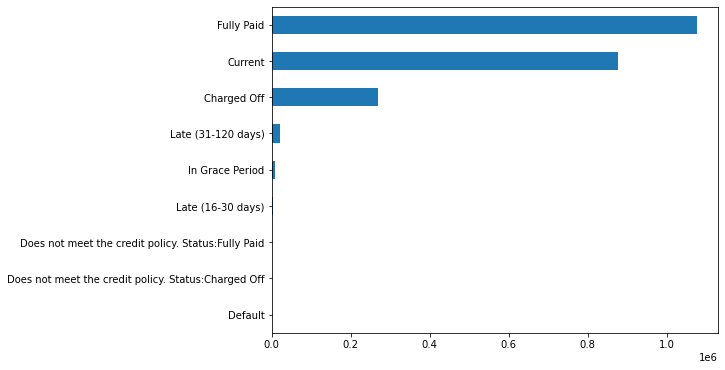

In [22]:
plt.figure(figsize=(8,6))
df["loan_status"].value_counts().sort_values().plot(kind="barh")

### Categorical Features

In [23]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='object']
print("Number of categorical features are: ",len(categorical_features))
categorical_features

Number of categorical features are:  24


['id',
 'term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [24]:
# Checking the number of unique values in each categorical column

for feature in categorical_features:
    print(feature)
    print(len(df[feature].unique()),"-->",df[feature].unique())
    print("===================================")

id
2260701 --> [68407277 68355089 68341763 ... '88215728'
 'Total amount funded in policy code 1: 1465324575'
 'Total amount funded in policy code 2: 521953170']
term
3 --> [' 36 months' ' 60 months' nan]
grade
8 --> ['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]
sub_grade
36 --> ['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4' 'D3' 'D2' 'D5' 'A5' 'F2' 'E1' 'F5' 'E5'
 'A3' 'G2' 'G1' 'G3' 'G4' 'F4' 'G5' nan]
emp_title
512695 --> ['leadman' 'Engineer' 'truck driver' ... 'Sr. Photo Producer'
 'Exec Dir Internal Audit' 'Current Operations Officer']
emp_length
12 --> ['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'
 '5 years' '2 years' '9 years' '< 1 year' nan]
home_ownership
7 --> ['MORTGAGE' 'RENT' 'OWN' 'ANY' nan 'NONE' 'OTHER']
verification_status
4 --> ['Not Verified' 'Source Verified' 'Verified' nan]
issue_d
140 --> ['Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015' 'Aug-2015' 'Jul-2015'
 'Jun-2015' 'May-2015' 'Apr-2015' 'Mar-20

755 --> ['Aug-2003' 'Dec-1999' 'Aug-2000' 'Sep-2008' 'Jun-1998' 'Oct-1987'
 'Jun-1990' 'Feb-1999' 'Apr-2002' 'Nov-1994' 'Apr-1995' 'Feb-1988'
 'Jun-1996' 'Jun-2005' 'May-1984' 'Dec-2001' 'Nov-1993' 'Sep-2001'
 'Mar-2005' 'May-2004' 'Jun-1991' 'May-2000' 'Oct-2011' 'May-1994'
 'Jul-2011' 'May-1991' 'May-2001' 'Jun-2002' 'Dec-1985' 'Apr-2007'
 'Feb-2002' 'Jun-2001' 'Jun-1997' 'Oct-1996' 'Jan-2005' 'Jul-2001'
 'Aug-2004' 'Jun-2007' 'Jul-2004' 'Apr-2001' 'Oct-2004' 'May-1992'
 'Oct-1999' 'Nov-2001' 'Oct-2005' 'Jan-2001' 'Sep-2004' 'Sep-1993'
 'Nov-2005' 'Feb-1989' 'Sep-2006' 'Oct-1982' 'Oct-2002' 'Feb-1990'
 'Aug-1987' 'Oct-1998' 'Aug-2001' 'Feb-2004' 'Aug-2009' 'Mar-2002'
 'Nov-1999' 'Jun-2006' 'Jan-1999' 'Jun-2000' 'Jan-2007' 'Dec-1998'
 'Aug-1997' 'Dec-1987' 'Feb-1996' 'Apr-1990' 'Jun-2004' 'Jun-1995'
 'Dec-2002' 'Aug-1986' 'Nov-2002' 'Oct-2006' 'Sep-2000' 'Feb-2012'
 'Apr-2005' 'Sep-1994' 'Apr-1993' 'Sep-2007' 'Jan-1998' 'May-2008'
 'Mar-2001' 'Apr-1994' 'Apr-2003' 'Jan-2002' 'Jan-2011

137 --> ['Jan-2019' 'Jun-2016' 'Jun-2017' 'Feb-2019' 'Jul-2016' 'May-2017'
 'Nov-2016' 'Jan-2017' 'Aug-2018' 'Apr-2017' 'Mar-2017' 'Feb-2018'
 'Sep-2016' 'Mar-2016' 'May-2016' 'Sep-2017' 'Dec-2017' 'Nov-2018'
 'Oct-2018' 'Aug-2016' 'Dec-2018' 'Dec-2016' 'Nov-2017' 'Mar-2018'
 'Aug-2017' 'Mar-2019' 'Jul-2017' 'Feb-2017' 'Oct-2016' 'Sep-2018'
 'Oct-2017' 'Apr-2018' 'May-2018' 'Apr-2016' 'Jan-2018' 'Jul-2018'
 'Jun-2018' 'Feb-2016' 'Jan-2016' nan 'Dec-2015' 'Nov-2015' 'Oct-2015'
 'Sep-2015' 'Aug-2015' 'Jul-2015' 'Jun-2015' 'May-2015' 'Apr-2015'
 'Mar-2015' 'Feb-2015' 'Jan-2015' 'Dec-2014' 'Nov-2014' 'Oct-2014'
 'Sep-2014' 'Aug-2014' 'Jul-2014' 'Jun-2014' 'May-2014' 'Apr-2014'
 'Mar-2014' 'Feb-2014' 'Apr-2013' 'Apr-2012' 'Nov-2012' 'Jun-2013'
 'Sep-2013' 'Jul-2012' 'Oct-2013' 'May-2013' 'Oct-2012' 'Sep-2012'
 'Dec-2012' 'Aug-2013' 'Nov-2013' 'Jan-2014' 'Aug-2012' 'Jul-2013'
 'Jun-2012' 'Feb-2013' 'Mar-2013' 'Jan-2013' 'Dec-2013' 'Feb-2012'
 'Jan-2012' 'Mar-2012' 'May-2012' 'Dec-2011' 'Nov-

In [25]:
# Checking which categorical feature has more than 100 categories
# Keeping only those categorical columns for which the unique categories are <=100

for col in categorical_features:
    if (len(df[col].unique())) > 100 :
        print(col)
        print(len(df[col].unique()))
        print(df[col].unique())
        print("===================================")

id
2260701
[68407277 68355089 68341763 ... '88215728'
 'Total amount funded in policy code 1: 1465324575'
 'Total amount funded in policy code 2: 521953170']
emp_title
512695
['leadman' 'Engineer' 'truck driver' ... 'Sr. Photo Producer'
 'Exec Dir Internal Audit' 'Current Operations Officer']
issue_d
140
['Dec-2015' 'Nov-2015' 'Oct-2015' 'Sep-2015' 'Aug-2015' 'Jul-2015'
 'Jun-2015' 'May-2015' 'Apr-2015' 'Mar-2015' 'Feb-2015' 'Jan-2015' nan
 'Mar-2018' 'Feb-2018' 'Jan-2018' 'Sep-2017' 'Aug-2017' 'Jul-2017'
 'Jun-2016' 'May-2016' 'Apr-2016' 'Sep-2018' 'Aug-2018' 'Jul-2018'
 'Jun-2017' 'May-2017' 'Apr-2017' 'Mar-2016' 'Feb-2016' 'Jan-2016'
 'Dec-2014' 'Nov-2014' 'Oct-2014' 'Sep-2014' 'Aug-2014' 'Jul-2014'
 'Jun-2014' 'May-2014' 'Apr-2014' 'Mar-2014' 'Feb-2014' 'Jan-2014'
 'Dec-2018' 'Nov-2018' 'Oct-2018' 'Jun-2018' 'May-2018' 'Apr-2018'
 'Dec-2011' 'Nov-2011' 'Oct-2011' 'Sep-2011' 'Aug-2011' 'Jul-2011'
 'Jun-2011' 'May-2011' 'Apr-2011' 'Mar-2011' 'Feb-2011' 'Jan-2011'
 'Dec-2010' 'Nov-201

earliest_cr_line
755
['Aug-2003' 'Dec-1999' 'Aug-2000' 'Sep-2008' 'Jun-1998' 'Oct-1987'
 'Jun-1990' 'Feb-1999' 'Apr-2002' 'Nov-1994' 'Apr-1995' 'Feb-1988'
 'Jun-1996' 'Jun-2005' 'May-1984' 'Dec-2001' 'Nov-1993' 'Sep-2001'
 'Mar-2005' 'May-2004' 'Jun-1991' 'May-2000' 'Oct-2011' 'May-1994'
 'Jul-2011' 'May-1991' 'May-2001' 'Jun-2002' 'Dec-1985' 'Apr-2007'
 'Feb-2002' 'Jun-2001' 'Jun-1997' 'Oct-1996' 'Jan-2005' 'Jul-2001'
 'Aug-2004' 'Jun-2007' 'Jul-2004' 'Apr-2001' 'Oct-2004' 'May-1992'
 'Oct-1999' 'Nov-2001' 'Oct-2005' 'Jan-2001' 'Sep-2004' 'Sep-1993'
 'Nov-2005' 'Feb-1989' 'Sep-2006' 'Oct-1982' 'Oct-2002' 'Feb-1990'
 'Aug-1987' 'Oct-1998' 'Aug-2001' 'Feb-2004' 'Aug-2009' 'Mar-2002'
 'Nov-1999' 'Jun-2006' 'Jan-1999' 'Jun-2000' 'Jan-2007' 'Dec-1998'
 'Aug-1997' 'Dec-1987' 'Feb-1996' 'Apr-1990' 'Jun-2004' 'Jun-1995'
 'Dec-2002' 'Aug-1986' 'Nov-2002' 'Oct-2006' 'Sep-2000' 'Feb-2012'
 'Apr-2005' 'Sep-1994' 'Apr-1993' 'Sep-2007' 'Jan-1998' 'May-2008'
 'Mar-2001' 'Apr-1994' 'Apr-2003' 'Jan-20

last_pymnt_d
137
['Jan-2019' 'Jun-2016' 'Jun-2017' 'Feb-2019' 'Jul-2016' 'May-2017'
 'Nov-2016' 'Jan-2017' 'Aug-2018' 'Apr-2017' 'Mar-2017' 'Feb-2018'
 'Sep-2016' 'Mar-2016' 'May-2016' 'Sep-2017' 'Dec-2017' 'Nov-2018'
 'Oct-2018' 'Aug-2016' 'Dec-2018' 'Dec-2016' 'Nov-2017' 'Mar-2018'
 'Aug-2017' 'Mar-2019' 'Jul-2017' 'Feb-2017' 'Oct-2016' 'Sep-2018'
 'Oct-2017' 'Apr-2018' 'May-2018' 'Apr-2016' 'Jan-2018' 'Jul-2018'
 'Jun-2018' 'Feb-2016' 'Jan-2016' nan 'Dec-2015' 'Nov-2015' 'Oct-2015'
 'Sep-2015' 'Aug-2015' 'Jul-2015' 'Jun-2015' 'May-2015' 'Apr-2015'
 'Mar-2015' 'Feb-2015' 'Jan-2015' 'Dec-2014' 'Nov-2014' 'Oct-2014'
 'Sep-2014' 'Aug-2014' 'Jul-2014' 'Jun-2014' 'May-2014' 'Apr-2014'
 'Mar-2014' 'Feb-2014' 'Apr-2013' 'Apr-2012' 'Nov-2012' 'Jun-2013'
 'Sep-2013' 'Jul-2012' 'Oct-2013' 'May-2013' 'Oct-2012' 'Sep-2012'
 'Dec-2012' 'Aug-2013' 'Nov-2013' 'Jan-2014' 'Aug-2012' 'Jul-2013'
 'Jun-2012' 'Feb-2013' 'Mar-2013' 'Jan-2013' 'Dec-2013' 'Feb-2012'
 'Jan-2012' 'Mar-2012' 'May-2012' 'Dec-20

In [26]:
# Dropping the "id" column and "url" column, as keeping them is not much useful
# Dropping all columns having unique values >100 --> emp_title, title, zip_code

not_required_columns = ["url","id","emp_title","title","zip_code"]
df.drop(columns = not_required_columns,axis=1,inplace=True)
print("Shape after removing unnecessary columns: ",df.shape)

Shape after removing unnecessary columns:  (2260701, 88)


In [27]:
# Also removing them from categorical_features list
categorical_features.remove("url")
categorical_features.remove("id")
categorical_features.remove("emp_title")
categorical_features.remove("title")
categorical_features.remove("zip_code")
categorical_features

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [28]:
# Lets check if there are columns having only 1 unique value

for col in df.columns:
    if (len(df[col].unique())) == 1 :
        print(col)
        print(len(df[col].unique()))
        print(df[col].unique())
        print("===================================")

In [29]:
# Handling the features containing dates
date_features = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

# Creating new features out of date features, containing month and year separately
# Month columns
#df["issue_d_month"] = df["issue_d"].apply(lambda x: str(x[:3]))
#df["earliest_cr_line_month"] = df["earliest_cr_line"].apply(lambda x: str(x[:3]))
#df["last_pymnt_d_month"] = df["last_pymnt_d"].apply(lambda x: str(x[:3]))
#df["last_credit_pull_d_month"] = df["last_credit_pull_d"].apply(lambda x: str(x[:3]))
# Year columns
#df["issue_d_year"] = df["issue_d"].apply(lambda x: int(x[-4:]))
#df["earliest_cr_line_year"] = df["earliest_cr_line"].apply(lambda x: int(x[-4:]))
#df["last_pymnt_d_year"] = df["last_pymnt_d"].apply(lambda x: int(x[-4:]))
#df["last_credit_pull_d_year"] = df["last_credit_pull_d"].apply(lambda x: int(x[-4:]))

In [30]:
# Creating new features out of date features, containing month and year separately

df[['issue_d_month','issue_d_year']] = df['issue_d'].str.split("-",expand=True)
df[['earliest_cr_line_month','earliest_cr_line_year']] = df['earliest_cr_line'].str.split("-",expand=True)
df[['last_pymnt_d_month','last_pymnt_d_year']] = df['last_pymnt_d'].str.split("-",expand=True)
df[['last_credit_pull_d_month','last_credit_pull_d_year']] = df['last_credit_pull_d'].str.split("-",expand=True)

In [31]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,Dec,2015,Aug,2003,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,Dec,2015,Dec,1999,Jun,2016,Mar,2019
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,Dec,2015,Aug,2000,Jun,2017,Mar,2019
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,debt_consolidation,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,Dec,2015,Sep,2008,Feb,2019,Mar,2019
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0

In [32]:
# Dropping the date columns
date_features = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
df.drop(date_features,axis=1,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,Dec,2015,Aug,2003,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,Dec,2015,Dec,1999,Jun,2016,Mar,2019
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,n,home_improvement,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,Dec,2015,Aug,2000,Jun,2017,Mar,2019
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Current,n,debt_consolidation,NJ,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,Dec,2015,Sep,2008,Feb,2019,Mar,2019
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,Dec,2015,J

In [33]:
# Count Plots
categorical_features


['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

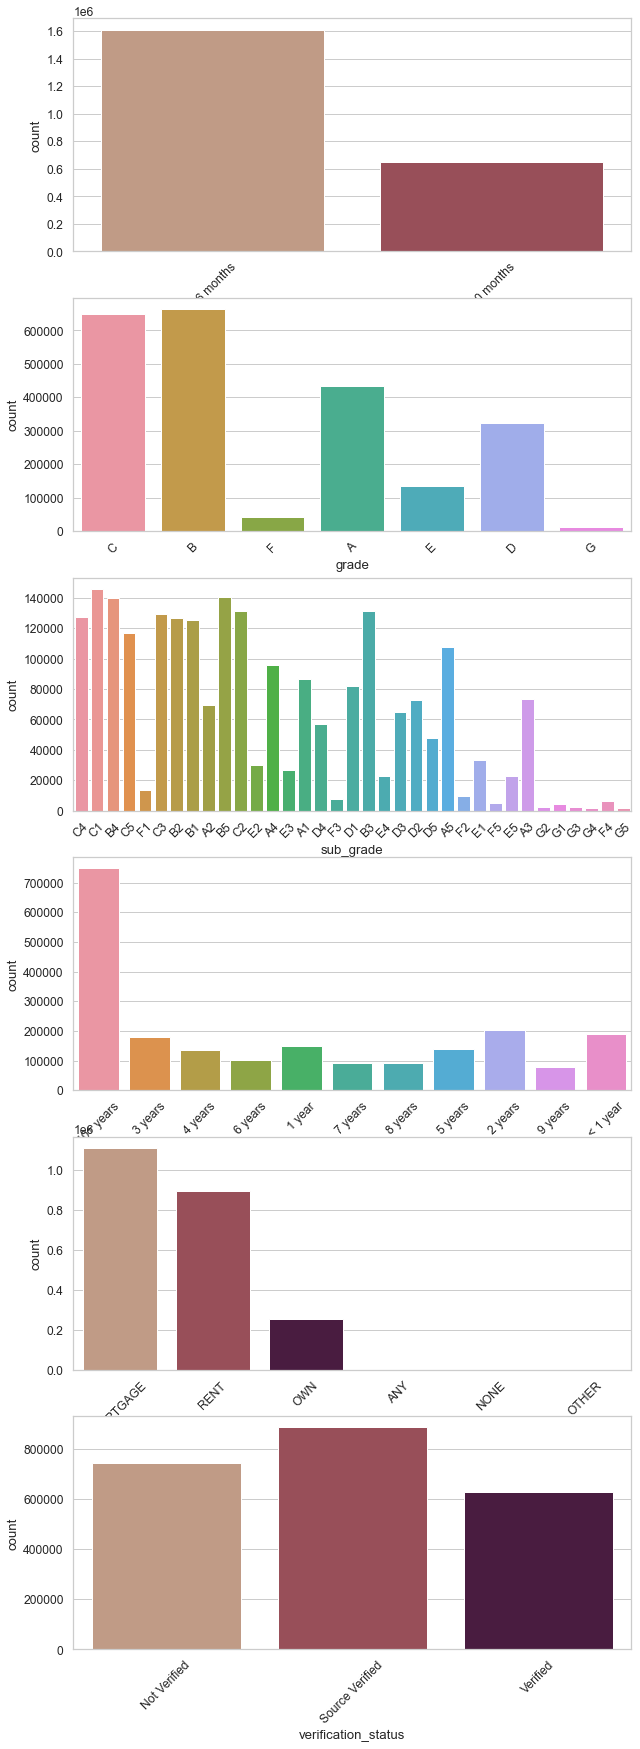

In [57]:
# Barplot of unique value counts in every categorical features
categorical = ['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'pymnt_plan',
 'purpose',
 'addr_state']

fig, ax = plt.subplots(6, 1, figsize=(10,30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

### Numerical Features

In [35]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='object']
print("Number of numerical features are: ",len(numerical_features))
numerical_features

Number of numerical features are:  69


['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev

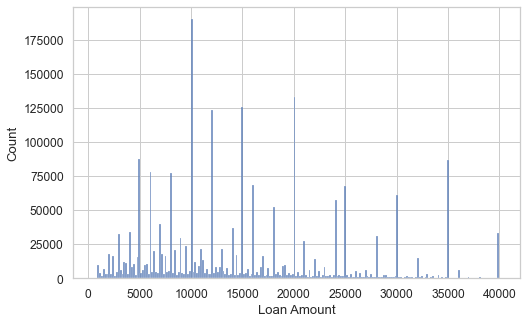

In [36]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(df['loan_amnt']).set(xlabel='Loan Amount', ylabel='Count');

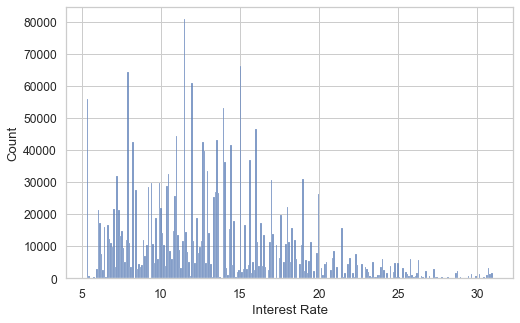

In [37]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(df['int_rate']).set(xlabel='Interest Rate', ylabel='Count');

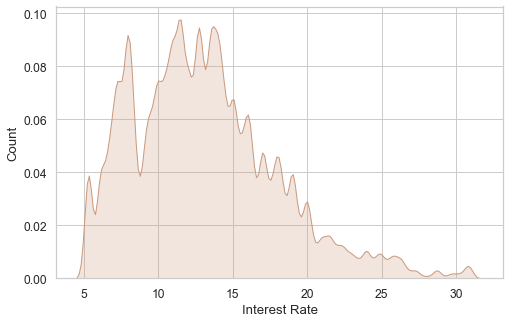

In [45]:
sns.set(style='whitegrid', palette="twilight_r", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.kdeplot(df['int_rate'],fill=True).set(xlabel='Interest Rate', ylabel='Count');

### Creating new data having only 2 categories from previous data "Fully Charged" & "Charged Off"

In [46]:
# Keeping rows with loan_status category either "Fully Paid" or "Charged Off"

loan = df[(df["loan_status"] == "Fully Paid") |(df["loan_status"] == "Charged Off")]
loan.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,Dec,2015,Aug,2003,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,Dec,2015,Dec,1999,Jun,2016,Mar,2019
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,n,home_improvement,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,Dec,2015,Aug,2000,Jun,2017,Mar,2019
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,Dec,2015,Jun,1998,Jul,2016,Mar,2018
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,34000.0,Source Verified,Fully Paid,n,debt_consolidation,GA,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,Dec,2015,Oct,1987,May,2017,May,2017
6,20000.

In [47]:
# Reseting the index of loan data
loan.reset_index(drop=True,inplace=True)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,Dec,2015,Aug,2003,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,Dec,2015,Dec,1999,Jun,2016,Mar,2019
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Fully Paid,n,home_improvement,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,Dec,2015,Aug,2000,Jun,2017,Mar,2019
3,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,Dec,2015,Jun,1998,Jul,2016,Mar,2018
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,34000.0,Source Verified,Fully Paid,n,debt_consolidation,GA,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.00,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,Dec,2015,Oct,1987,May,2017,May,2017
...

In [48]:

loan.shape

(1345310, 92)

In [49]:
# Replacing "Fully Paid" with 1 and "Charged Off" as 0

mapping_dict = {"loan_status":{"Fully Paid":1,"Charged Off":0}}
loan = loan.replace(mapping_dict)

In [50]:
loan.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
203107,16000.0,16000.0,16000.0,36 months,10.99,523.75,B,B4,10+ years,MORTGAGE,60000.0,Source Verified,1,n,debt_consolidation,CO,14.62,0.0,700.0,704.0,0.0,17.0,0.0,18880.0,42.7,35.0,w,0.0,0.0,17684.780000,17684.78,16000.00,1684.78,0.0,0.0,0.0,3304.32,779.0,775.0,0.0,1.0,Individual,0.0,8398.0,128686.0,44200.0,6.0,8043.0,4219.0,55.1,0.0,0.0,124.0,267.0,6.0,6.0,2.0,48.0,11.0,5.0,2.0,5.0,2.0,8.0,4.0,14.0,29.0,5.0,17.0,0.0,0.0,0.0,4.0,90.6,0.0,0.0,0.0,186267.0,21072.0,9400.0,9400.0,N,Cash,N,Jul,2015,Mar,1993,Oct,2016,Dec,2018
788324,24000.0,24000.0,24000.0,36 months,11.67,793.37,B,B4,3 years,RENT,127000.0,Verified,1,n,credit_card,CA,12.98,0.0,685.0,689.0,0.0,5.0,0.0,50299.0,96.5,10.0,w,0.0,0.0,28604.028970,28604.03,24000.00,4604.03,0.0,0.0,0.0,793.20,699.0,695.0,0.0,1.0,Individual,0.0,0.0,50299.0,52100.0,0.0,10060.0,1801.0,96.5,0.0,0.0,133.0,387.0,26.0,26.0,0.0,26.0,NaN,0.0,5.0,5.0,5.0,6.0,3.0,5.0,7.0,5.0,5.0,0.0,0.0,0.0,0.0,100.0,80.0,0.0,0.0,52100.0,50299.0,52100.0,0.0,N,Cash,N,Jul,2014,Mar,1982,Jul,2017,Mar,2019
1224295,10000.0,10000.0,10000.0,36 months,8.99,317.96,B,B1,3 years,MORTGAGE,155000.0,Not Verified,0,n,other,MD,20.06,0.0,755.0,759.0,0.0,13.0,0.0,11212.0,38.8,30.0,w,0.0,0.0,630.930000,630.93,487.91,143.02,0.0,0.0,0.0,317.96,524.0,520.0,0.0,1.0,Individual,0.0,0.0,148611.0,28900.0,3.0,11432.0,12269.0,45.7,0.0,0.0,126.0,160.0,37.0,8.0,2.0,53.0,2.0,0.0,3.0,5.0,5.0,8.0,13.0,9.0,15.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,40.0,0.0,0.0,209597.0,111285.0,22600.0,124497.0,N,Cash,N,Aug,2016,Apr,2003,Oct,2016,Oct,2017
1218886,8000.0,8000.0,8000.0,36 months,12.79,268.75,C,C1,< 1 year,RENT,30000.0,Verified,1,n,debt_consolidation,ID,32.56,0.0,675.0,679.0,0.0,10.0,0.0,6217.0,48.2,16.0,w,0.0,0.0,9116.659369,9116.66,8000.00,1116.66,0.0,0.0,0.0,4013.59,734.0,730.0,0.0,1.0,Individual,0.0,4467.0,25716.0,12900.0,4.0,2857.0,1377.0,81.6,0.0,0.0,30.0,89.0,7.0,7.0,0.0,7.0,5.0,0.0,3.0,5.0,3.0,3.0,4.0,7.0,12.0,5.0,10.0,0.0,0.0,0.0,1.0,93.3,66.7,0.0,0.0,42309.0,25716.0,7500.0,29409.0,N,Cash,N,Aug,2016,Mar,2009,Feb,2018,Jan,2019
559171,10000.0,10000.0,10000.0,36 months,11.39,329.24,B,B3,6 years,RENT,90000.0,Verified,1,n,debt_consolidation,RI,11.56,0.0,675.0,679.0,0.0,8.0,0.0,16257.0,73.6,22.0,w,0.0,0.0,11289.608757,11289.61,10000.00,1289.61,0.0,0.0,0.0,995.59,639.0,635.0,0.0,1.0,Individual,0.0,0.0,24546.0,22100.0,4.0,3068.0,3143.0,83.8,0.0,0.0,74.0,86.0,4.0,4.0,0.0,4.0,20.0,0.0,5.0,5.0,5.0,9.0,7.0,7.0,15.0,5.0,8.0,0.0,0.0,0.0,2.0,100.0,80.0,0.0,0.0,36100.0,24546.0,19400.0,14000.0,N,Cash,N,Apr,2017,Jan,2010,Sep,2018,Sep,2018


In [51]:
# Lets check the distribution of target variable

print("Value Counts of Class")
print(loan['loan_status'].value_counts())
print("***********************************")
print("Percentage of Classes")
print((loan['loan_status'].value_counts()/loan.shape[0])*100)

Value Counts of Class
1    1076751
0     268559
Name: loan_status, dtype: int64
***********************************
Percentage of Classes
1    80.037389
0    19.962611
Name: loan_status, dtype: float64


The data is imbalanced, we have to consider f1_score for evaluation.

### Visualization of numerical data

In [52]:
len(numerical_features)

69

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

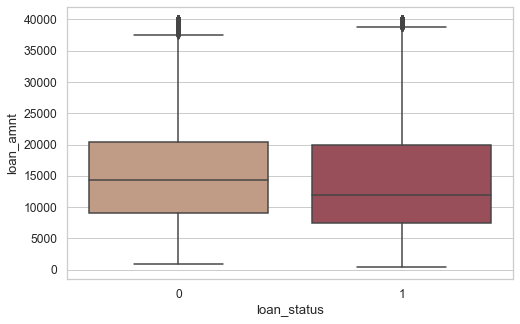

In [53]:
#for feature in loan.columns:
    #try:
sns.boxplot(x="loan_status", y="loan_amnt", data=loan)
    #except:
        #pass

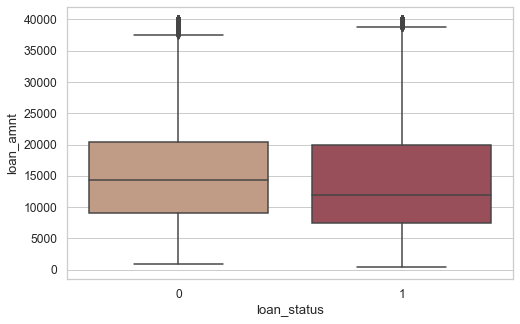

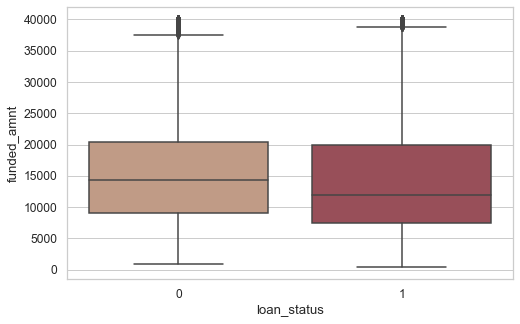

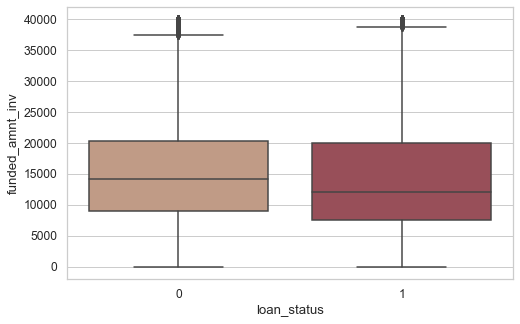

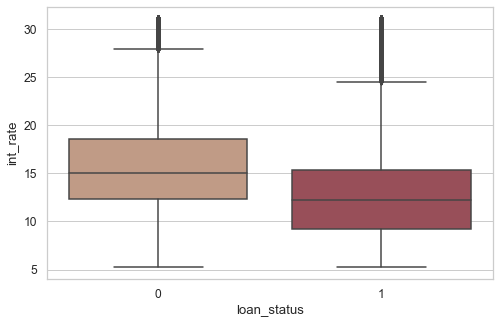

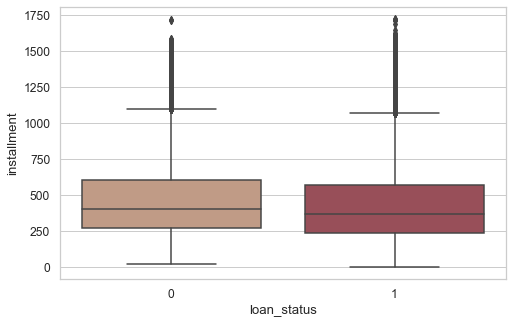

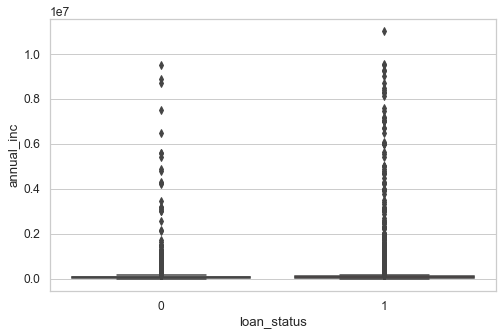

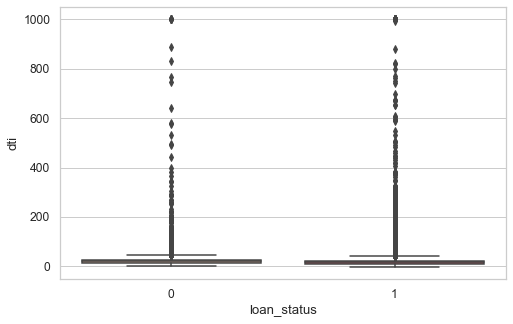

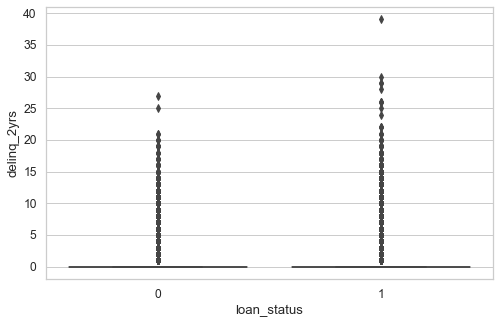

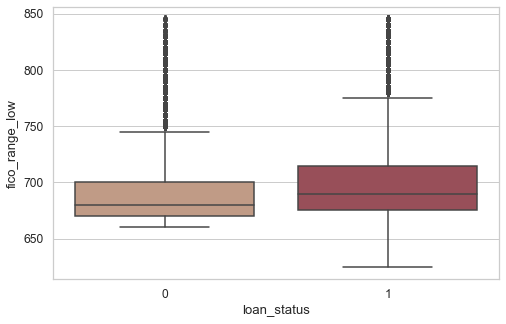

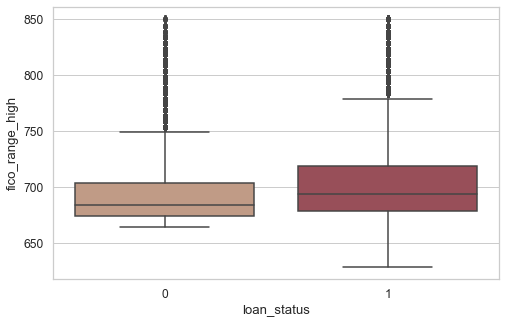

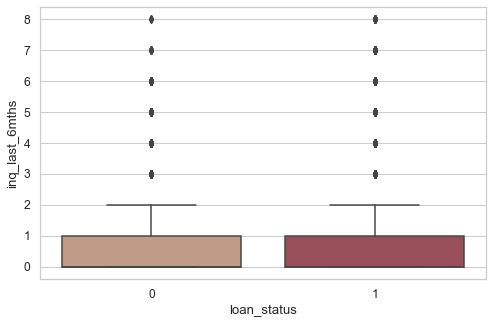

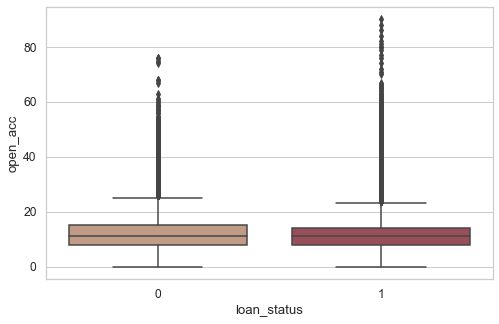

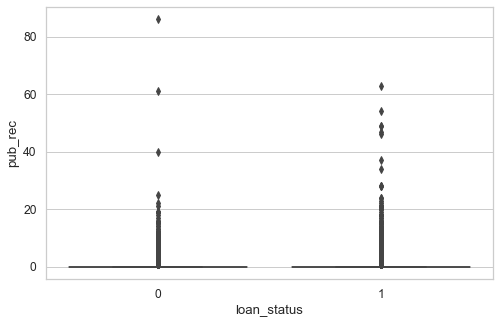

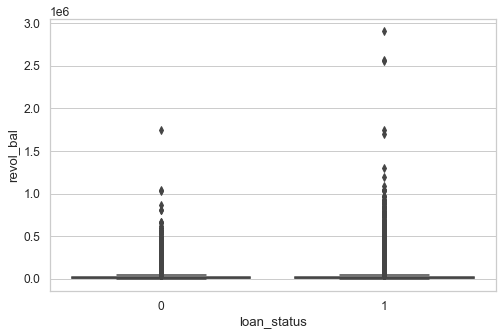

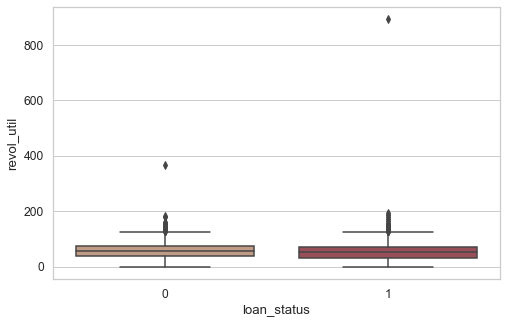

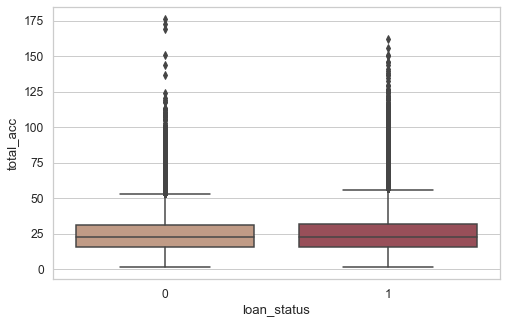

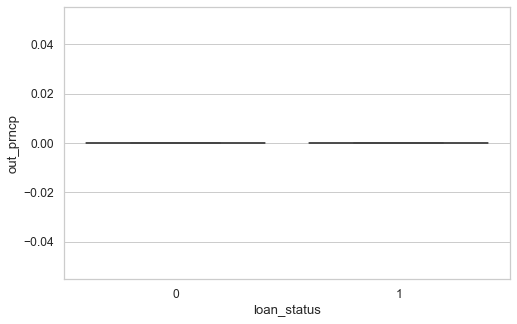

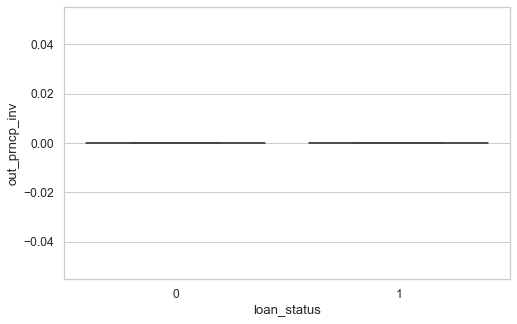

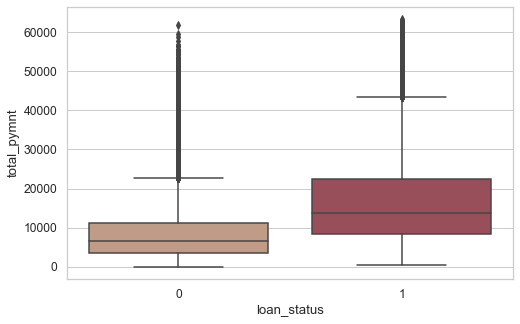

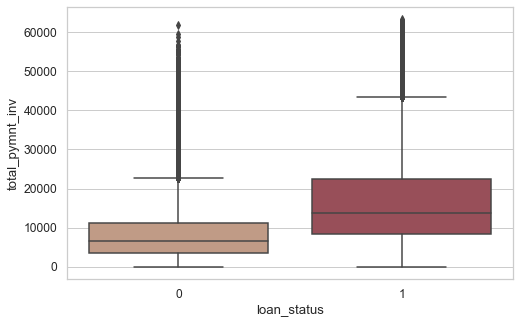

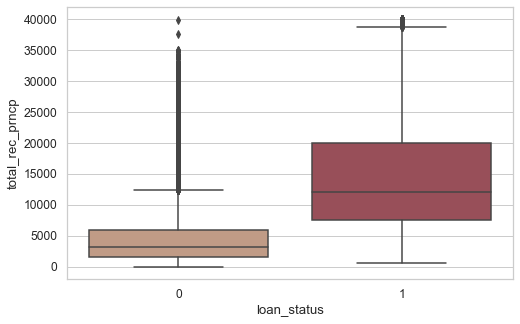

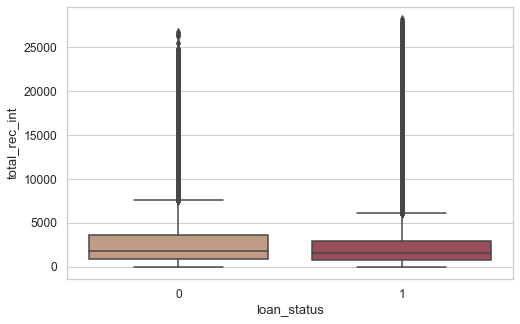

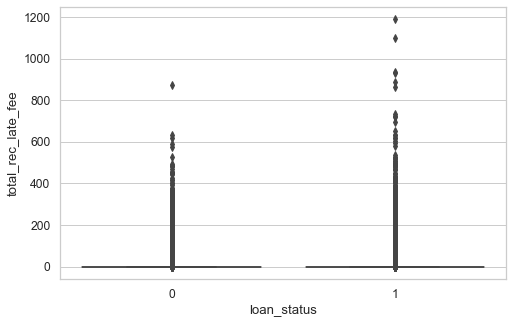

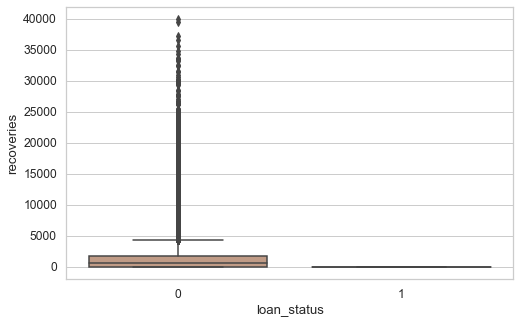

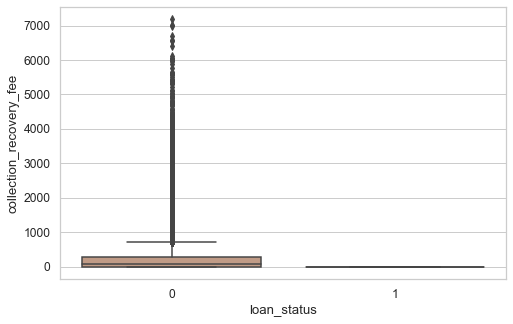

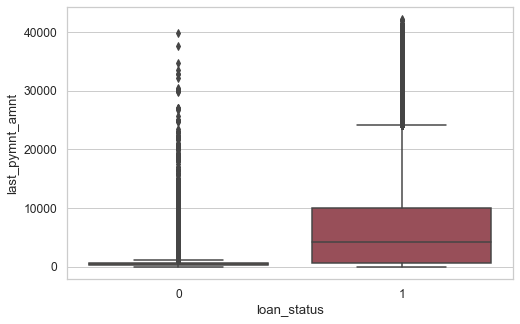

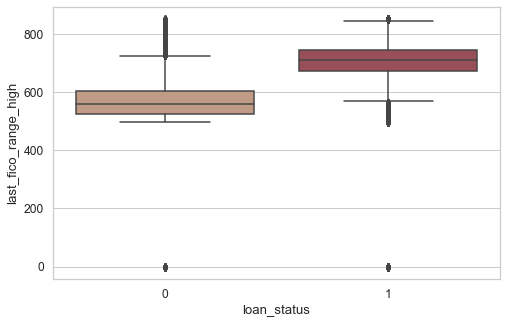

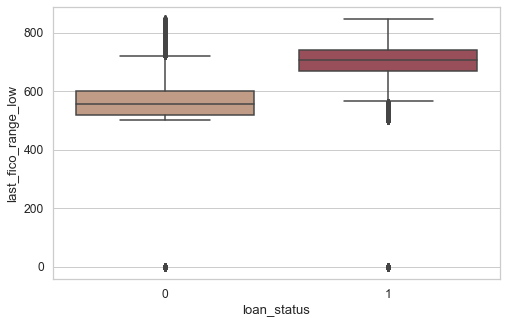

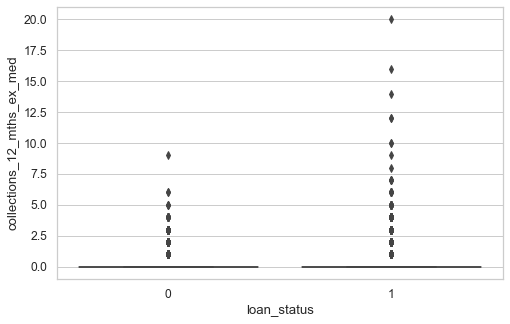

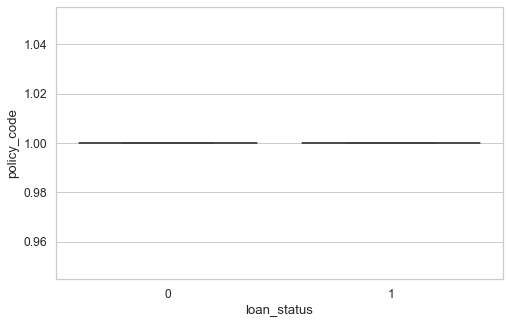

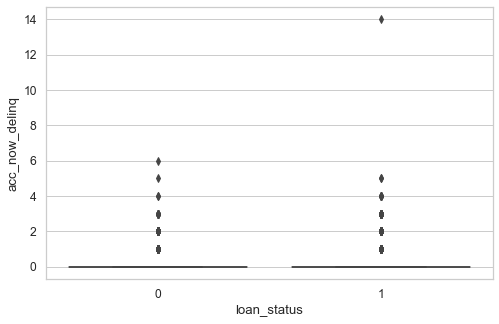

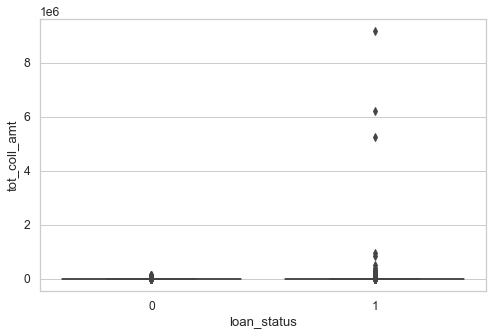

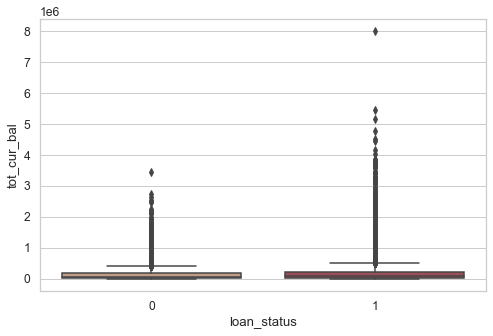

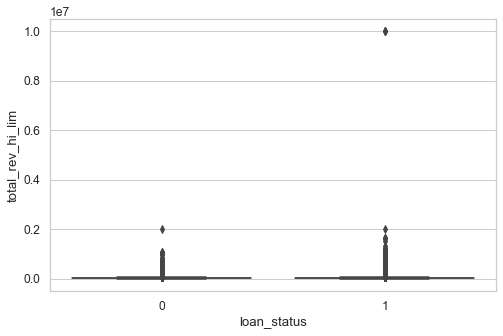

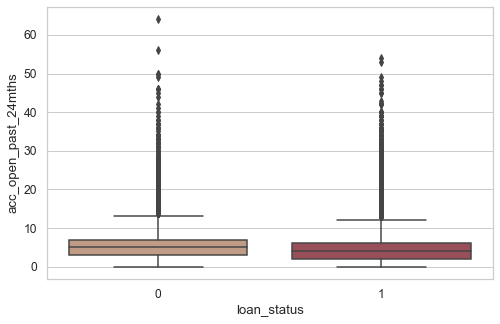

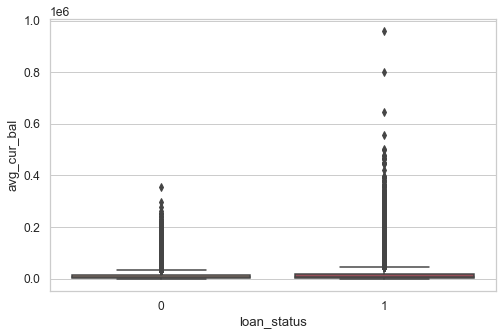

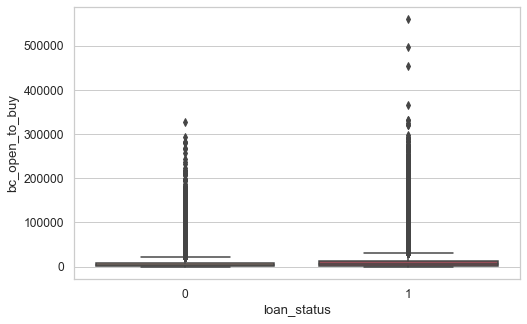

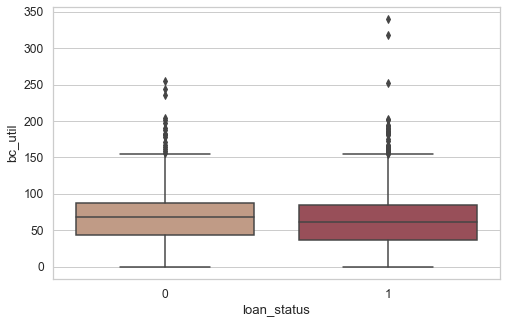

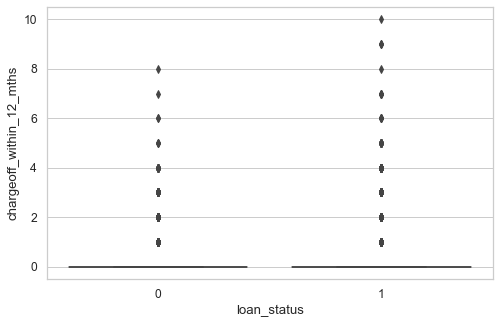

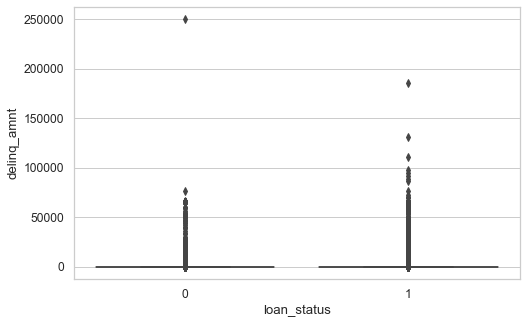

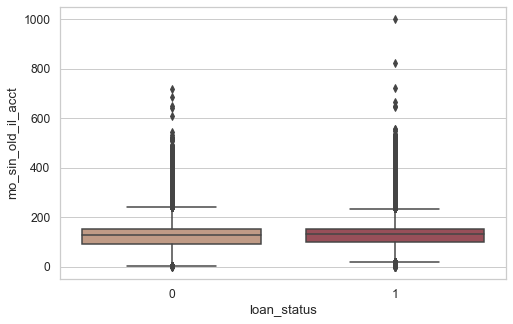

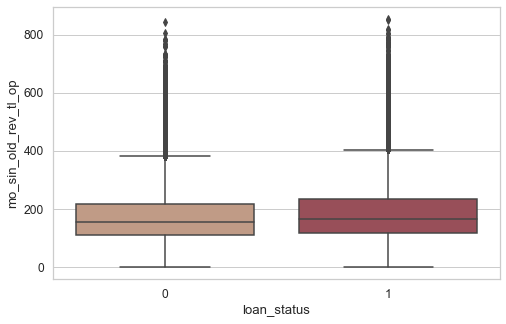

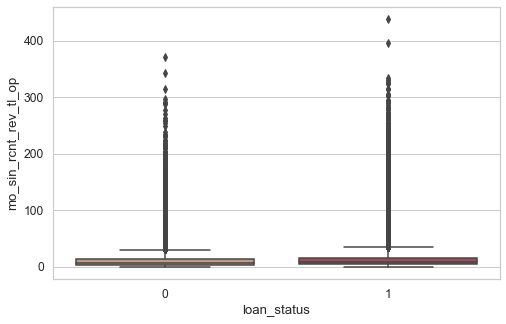

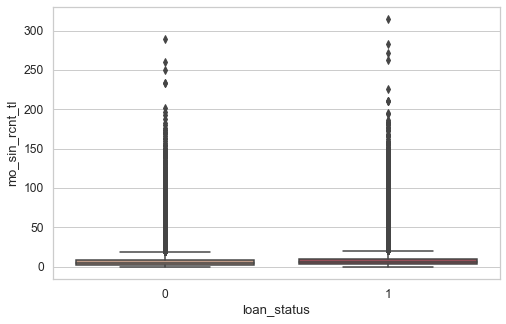

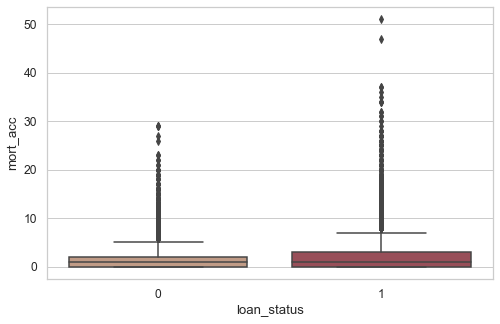

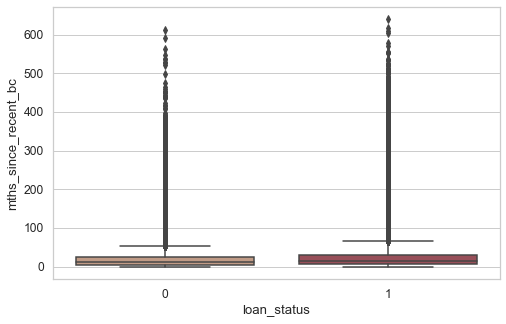

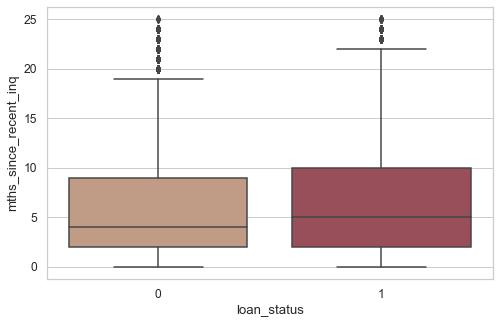

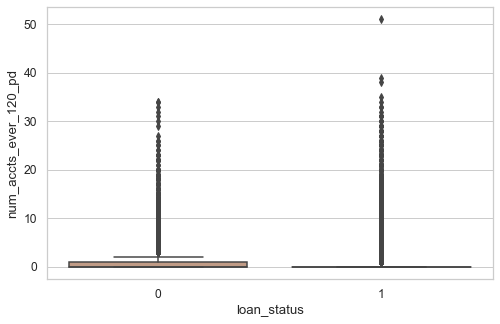

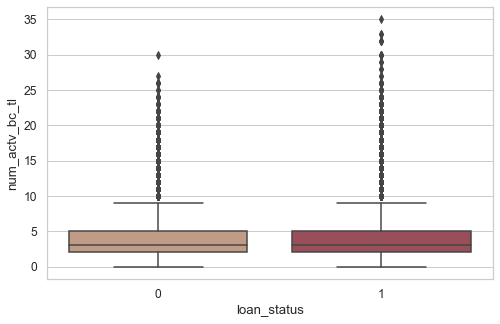

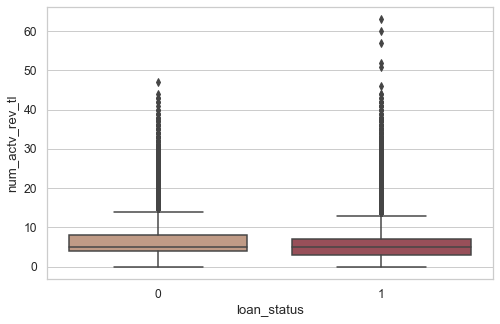

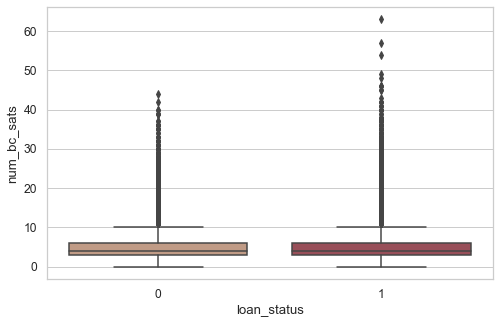

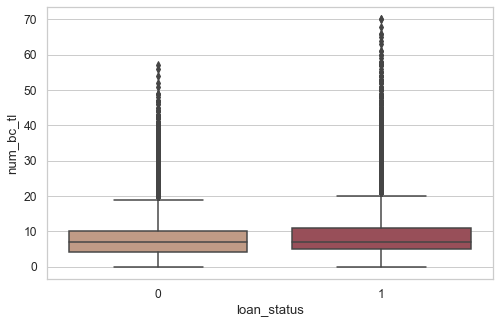

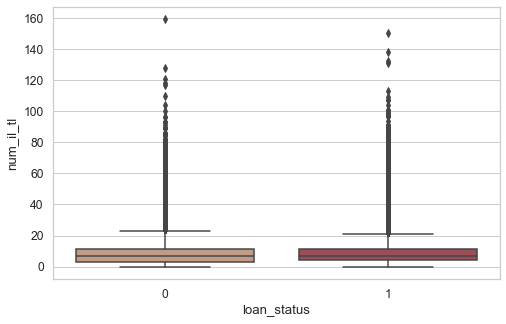

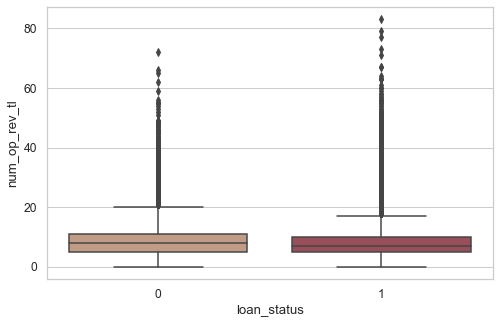

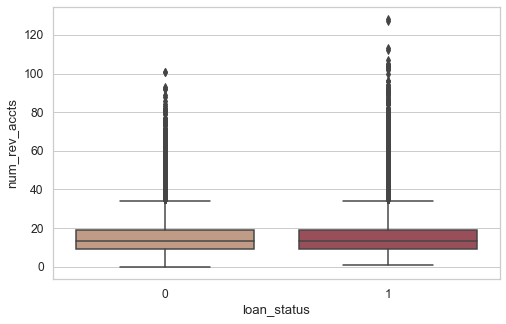

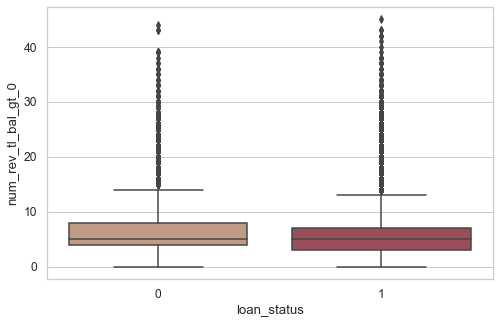

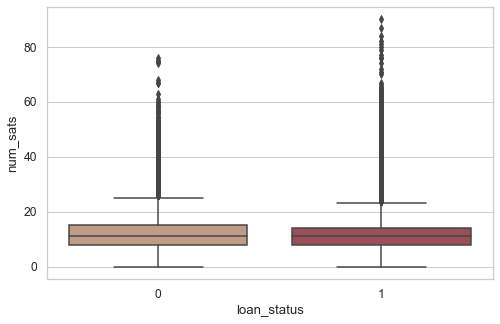

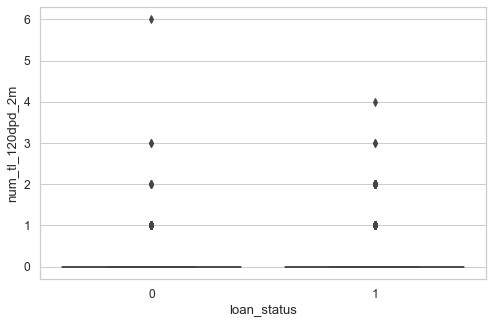

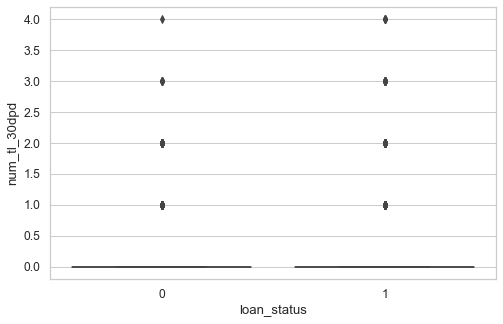

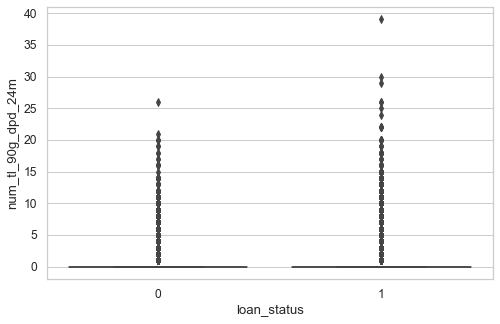

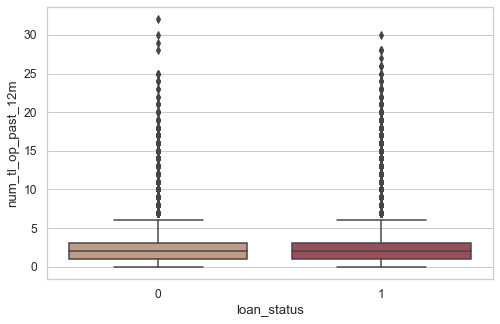

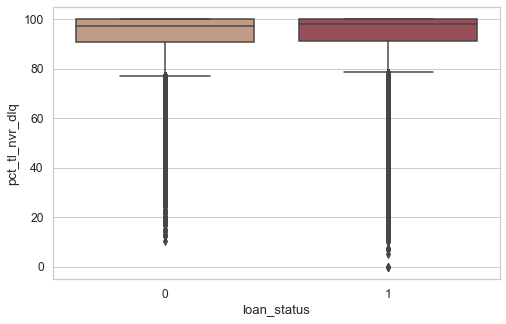

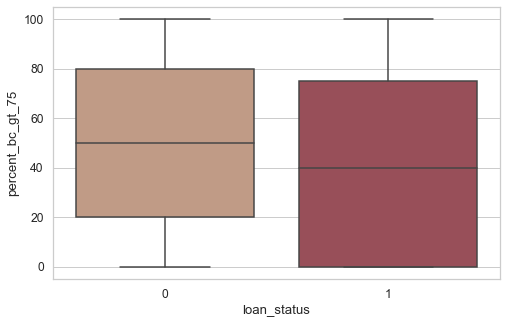

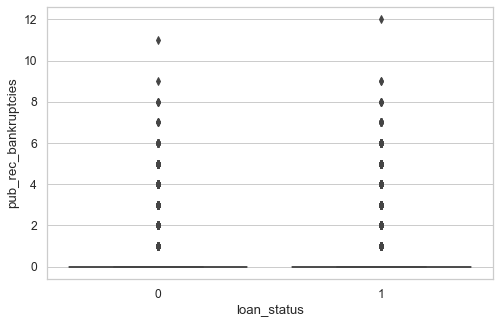

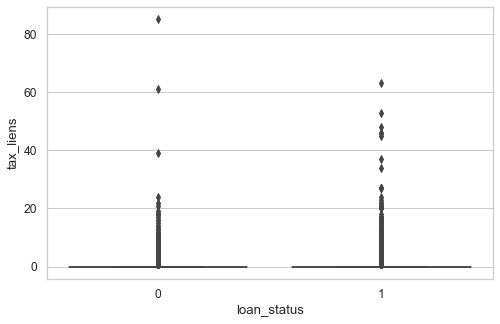

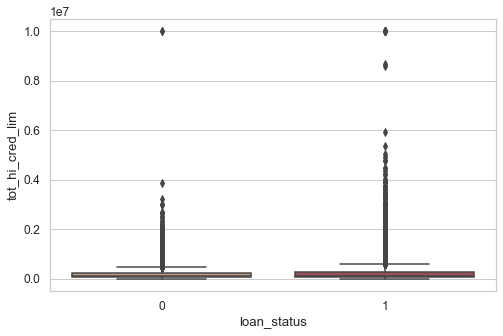

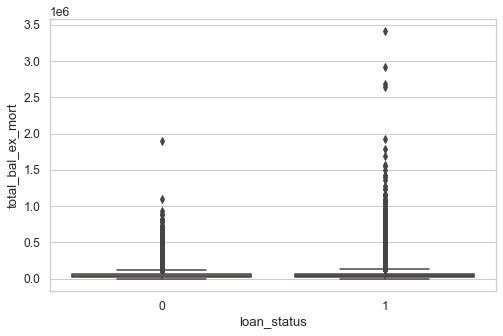

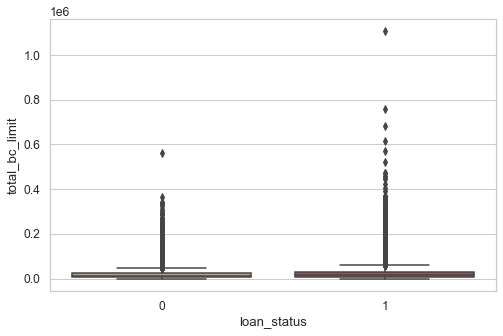

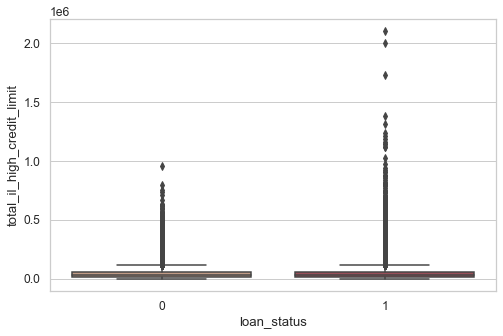

In [58]:
for col in numerical_features:
    try:
        sns.boxplot(x="loan_status", y=col, data=loan)
        plt.show()
        
    except:
        pass

### Handling Null values

In [59]:
# Categorical Features
cat_f = [feature for feature in loan.columns if loan[feature].dtypes=='object']

for feature in cat_f:
    loan[feature].fillna(value=loan[feature].mode(),inplace=True)

In [60]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,1,n,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,Dec,2015,Aug,2003,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,1,n,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,Dec,2015,Dec,1999,Jun,2016,Mar,2019
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,1,n,home_improvement,IL,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,Dec,2015,Aug,2000,Jun,2017,Mar,2019
3,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,1,n,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,Dec,2015,Jun,1998,Jul,2016,Mar,2018
4,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,34000.0,Source Verified,1,n,debt_consolidation,GA,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N,Dec,2015,Oct,1987,May,2017,May,2017


In [61]:
len(cat_f)

22

In [62]:
# Numerical Features 
num_f = [feature for feature in loan.columns if loan[feature].dtypes != 'object']

for feature in num_f:
    loan[feature].fillna(value=loan[feature].median(), inplace=True)

In [63]:
loan.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
                            ... 
earliest_cr_line_year          0
last_pymnt_d_month          2313
last_pymnt_d_year           2313
last_credit_pull_d_month      55
last_credit_pull_d_year       55
Length: 92, dtype: int64

In [64]:
# Dropping last 4 columns since, there null values are not replaced
drop = ['last_pymnt_d_month','last_pymnt_d_year','last_credit_pull_d_month','last_credit_pull_d_year']
loan.drop(columns=drop,axis=1,inplace=True)
loan.shape

(1345310, 88)

In [65]:
loan.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
                         ..
debt_settlement_flag      0
issue_d_month             0
issue_d_year              0
earliest_cr_line_month    0
earliest_cr_line_year     0
Length: 88, dtype: int64

### Label Encoding - Categorical features

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
cat_f.remove('last_pymnt_d_month')
cat_f.remove('last_pymnt_d_year')
cat_f.remove('last_credit_pull_d_month')
cat_f.remove('last_credit_pull_d_year')
cat_f

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year']

In [68]:
label_encoder = LabelEncoder()
for feature in cat_f:
    loan[feature] = label_encoder.fit_transform(loan[feature])

In [69]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,3600.0,3600.0,3600.0,0,13.99,123.03,2,13,1,1,55000.0,0,1,0,2,38,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,0,0,2,8,1,59
1,24700.0,24700.0,24700.0,0,11.99,820.28,2,10,1,1,65000.0,0,1,0,11,41,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0,0,2,8,2,55
2,20000.0,20000.0,20000.0,1,10.78,432.66,1,8,1,1,63000.0,0,1,0,4,14,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,1,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,1,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,0,0,2,8,1,56
3,10400.0,10400.0,10400.0,1,22.45,289.91,5,25,3,1,104433.0,1,1,0,6,38,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,0,0,0,2,8,6,54
4,11950.0,11950.0,11950.0,0,13.44,405.18,2,12,4,5,34000.0,1,1,0,2,10,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,1,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,0,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,0,0,0,2,8,10,43


In [70]:
# Changing position of target variable
loan['loan_sts'] = loan['loan_status']
loan.drop(columns='loan_status',inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,loan_sts
0,3600.0,3600.0,3600.0,0,13.99,123.03,2,13,1,1,55000.0,0,0,2,38,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,0,0,2,8,1,59,1
1,24700.0,24700.0,24700.0,0,11.99,820.28,2,10,1,1,65000.0,0,0,11,41,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0,0,2,8,2,55,1
2,20000.0,20000.0,20000.0,1,10.78,432.66,1,8,1,1,63000.0,0,0,4,14,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,1,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,1,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,0,0,2,8,1,56,1
3,10400.0,10400.0,10400.0,1,22.45,289.91,5,25,3,1,104433.0,1,0,6,38,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,0,0,0,2,8,6,54,1
4,11950.0,11950.0,11950.0,0,13.44,405.18,2,12,4,5,34000.0,1,0,2,10,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,1,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,0,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,0,0,0,2,8,10,43,1


### Scaling the features

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
loan_copy = loan.copy()
y = loan_copy.iloc[:,-1]
loan_copy.drop(columns='loan_sts',axis=1,inplace=True)
x=loan_copy
print(x.shape,y.shape)

(1345310, 87) (1345310,)


In [73]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1345305    1
1345306    1
1345307    0
1345308    1
1345309    0
Name: loan_sts, Length: 1345310, dtype: int64

In [74]:
x

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,3600.0,3600.0,3600.0,0,13.99,123.03,2,13,1,1,55000.0,0,0,2,38,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,0,0,2,8,1,59
1,24700.0,24700.0,24700.0,0,11.99,820.28,2,10,1,1,65000.0,0,0,11,41,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0,0,2,8,2,55
2,20000.0,20000.0,20000.0,1,10.78,432.66,1,8,1,1,63000.0,0,0,4,14,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,1,0.0,0.0,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,1,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,0,0,2,8,1,56
3,10400.0,10400.0,10400.0,1,22.45,289.91,5,25,3,1,104433.0,1,0,6,38,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,0,0,0,2,8,6,54
4,11950.0,11950.0,11950.0,0,13.44,405.18,2,12,4,5,34000.0,1,0,2,10,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,1,0.0,0.0,13708.948530,13708.95,11950.00,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,0,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,0,0,0,2,8,10,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,18000.0,18000.0,18000.0,1,9.49,377.95,1,6,5,4,130000.0,0,0,4,43,20.59,0.0,735.0,739.0,1.0,17.0,0.0,23833.0,34.0,39.0,0,0.0,0.0,20756.233632,20756.23,18000.00,2756.23,0.0,0.0,0.0,12828.77,709.0,705.0,0.0,1.0,0,0.0,0.0,168758.0,70100.

In [75]:
scaler = MinMaxScaler()
scaler.fit(x)
norm_df = pd.DataFrame(scaler.transform(x),index=x.index, columns=x.columns)
norm_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,0.078481,0.078481,0.09000,0.0,0.338006,0.068867,0.333333,0.382353,0.090909,0.2,0.005000,0.0,0.0,0.153846,0.76,0.00691,0.000000,0.227273,0.226244,0.125,0.077778,0.000000,0.000952,0.033285,0.063218,1.0,0.0,0.0,0.069857,0.069857,0.090000,0.029147,4.289932e-12,0.0,0.0,0.002907,0.663529,0.662722,0.0,0.0,0.0,0.0,0.000079,0.018113,0.00093,0.062500,0.021607,0.002690,0.109541,0.0,0.0,0.148148,0.148235,0.006849,0.009554,0.019608,0.006260,0.16,0.039216,0.057143,0.063492,0.031746,0.071429,0.018868,0.048193,0.070312,0.088889,0.077778,0.0,0.0,0.0,0.09375,0.769,0.000,0.000000,0.0,0.017805,0.002273,0.002171,0.006534,0.0,0.0,0.0,0.181818,0.727273,0.090909,0.830986
1,0.612658,0.612658,0.61750,0.0,0.260125,0.475450,0.333333,0.294118,0.090909,0.2,0.005910,0.0,0.0,0.846154,0.82,0.01706,0.025641,0.409091,0.407240,0.500,0.244444,0.000000,0.007391,0.021517,0.206897,1.0,0.0,0.0,0.405702,0.405702,0.617500,0.034749,4.289932e-12,0.0,0.0,0.021956,0.822353,0.822485,0.0,0.0,0.0,0.0,0.000000,0.025549,0.01118,0.062500,0.010159,0.103284,0.079800,0.0,0.0,0.113113,0.223529,0.004566,0.006369,0.078431,0.003130,0.00,0.000000,0.142857,0.079365,0.206349,0.242857,0.037736,0.240964,0.210938,0.111111,0.244444,0.0,0.0,0.0,0.06250,0.974,0.077,0.000000,0.0,0.031402,0.011583,0.071732,0.011735,0.0,0.0,0.0,0.181818,0.727273,0.181818,0.774648
2,0.493671,0.493671,0.50000,1.0,0.213006,0.249420,0.166667,0.235294,0.090909,0.2,0.005728,0.0,0.0,0.307692,0.28,0.01178,0.000000,0.318182,0.316742,0.000,0.066667,0.000000,0.002709,0.062983,0.091954,1.0,0.0,0.0,0.358721,0.358721,0.500000,0.095980,4.289932e-12,0.0,0.0,0.374793,0.828235,0.828402,0.0,0.0,1.0,0.0,0.000000,0.023712,0.00140,0.093750,0.033000,0.004888,0.164605,0.0,0.0,0.125125,0.214118,0.031963,0.044586,0.098039,0.158059,0.40,0.000000,0.057143,0.047619,0.031746,0.057143,0.037736,0.048193,0.054688,0.066667,0.066667,0.0,0.0,0.0,0.00000,1.000,0.500,0.000000,0.0,0.021842,0.005486,0.005608,0.007078,0.0,0.0,0.0,0.181818,0.727273,0.090909,0.788732
3,0.250633,0.250633,0.26000,1.0,0.667445,0.166179,0.833333,0.735294,0.272727,0.2,0.009495,0.5,0.0,0.461538,0.76,0.02637,0.025641,0.318182,0.316742,0.375,0.133333,0.000000,0.007549,0.072285,0.189655,1.0,0.0,0.0,0.185483,0.185483,0.260000,0.047548,4.289932e-12,0.0,0.0,0.240068,0.828235,0.828402,0.0,0.0,0.0,0.0,0.000000,0.041466,0.00340,0.156250,0.028853,0.008157,0.228210,0.0,0.0,0.128128,0.244706,0.009132,0.012739,0.117647,0.006260,0.04,0.000000,0.114286,0.095238,0.079365,0.128571,0.062893,0.084337,0.148438,0.133333,0.133333,0.0,0.0,0.0,0.12500,0.966,0.600,0.000000,0.0,0.043957,0.028100,0.018363,0.041913,0.0,0.0,0.0,0.181818,0.727273,0.545455,0.760563
4,0.289873,0.289873,0.29875,0.0,0.316589,0.233396,0.333333,0.35294

# Random Forest for feature selection

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
new_feature = np.random.normal(size=(1345310,1))

In [78]:
new_feature

array([[ 0.81897208],
       [ 0.1017467 ],
       [ 1.3698861 ],
       ...,
       [ 0.42805144],
       [-0.05335345],
       [-0.17126832]])

In [79]:
# scaling the new feature
scaler.fit(new_feature)
new_feature = pd.DataFrame(scaler.transform(new_feature))
new_feature.rename(columns={0:'new_feature'},inplace=True)
new_feature

,new_feature
0,0.593759
1,0.520156
2,0.650295
3,0.414767
4,0.535251
...,...
1345305,0.516338
1345306,0.281398
1345307,0.553642
1345308,0.504240


In [80]:
new_feature.shape

(1345310, 1)

In [81]:
norm_df.shape

(1345310, 87)

In [82]:
# Adding this new column to the norm_df 
x = pd.concat([norm_df,new_feature],axis=1,ignore_index=False)
x

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,new_feature
0,0.078481,0.078481,0.09000,0.0,0.338006,0.068867,0.333333,0.382353,0.090909,0.2,0.005000,0.0,0.0,0.153846,0.76,0.00691,0.000000,0.227273,0.226244,0.125,0.077778,0.000000,0.000952,0.033285,0.063218,1.0,0.0,0.0,0.069857,0.069857,0.090000,0.029147,4.289932e-12,0.0,0.0,0.002907,0.663529,0.662722,0.0,0.0,0.0,0.0,0.000079,0.018113,0.00093,0.062500,0.021607,0.002690,0.109541,0.0,0.0,0.148148,0.148235,0.006849,0.009554,0.019608,0.006260,0.16,0.039216,0.057143,0.063492,0.031746,0.071429,0.018868,0.048193,0.070312,0.088889,0.077778,0.0,0.0,0.0,0.09375,0.769,0.000,0.000000,0.0,0.017805,0.002273,0.002171,0.006534,0.0,0.0,0.0,0.181818,0.727273,0.090909,0.830986,0.593759
1,0.612658,0.612658,0.61750,0.0,0.260125,0.475450,0.333333,0.294118,0.090909,0.2,0.005910,0.0,0.0,0.846154,0.82,0.01706,0.025641,0.409091,0.407240,0.500,0.244444,0.000000,0.007391,0.021517,0.206897,1.0,0.0,0.0,0.405702,0.405702,0.617500,0.034749,4.289932e-12,0.0,0.0,0.021956,0.822353,0.822485,0.0,0.0,0.0,0.0,0.000000,0.025549,0.01118,0.062500,0.010159,0.103284,0.079800,0.0,0.0,0.113113,0.223529,0.004566,0.006369,0.078431,0.003130,0.00,0.000000,0.142857,0.079365,0.206349,0.242857,0.037736,0.240964,0.210938,0.111111,0.244444,0.0,0.0,0.0,0.06250,0.974,0.077,0.000000,0.0,0.031402,0.011583,0.071732,0.011735,0.0,0.0,0.0,0.181818,0.727273,0.181818,0.774648,0.520156
2,0.493671,0.493671,0.50000,1.0,0.213006,0.249420,0.166667,0.235294,0.090909,0.2,0.005728,0.0,0.0,0.307692,0.28,0.01178,0.000000,0.318182,0.316742,0.000,0.066667,0.000000,0.002709,0.062983,0.091954,1.0,0.0,0.0,0.358721,0.358721,0.500000,0.095980,4.289932e-12,0.0,0.0,0.374793,0.828235,0.828402,0.0,0.0,1.0,0.0,0.000000,0.023712,0.00140,0.093750,0.033000,0.004888,0.164605,0.0,0.0,0.125125,0.214118,0.031963,0.044586,0.098039,0.158059,0.40,0.000000,0.057143,0.047619,0.031746,0.057143,0.037736,0.048193,0.054688,0.066667,0.066667,0.0,0.0,0.0,0.00000,1.000,0.500,0.000000,0.0,0.021842,0.005486,0.005608,0.007078,0.0,0.0,0.0,0.181818,0.727273,0.090909,0.788732,0.650295
3,0.250633,0.250633,0.26000,1.0,0.667445,0.166179,0.833333,0.735294,0.272727,0.2,0.009495,0.5,0.0,0.461538,0.76,0.02637,0.025641,0.318182,0.316742,0.375,0.133333,0.000000,0.007549,0.072285,0.189655,1.0,0.0,0.0,0.185483,0.185483,0.260000,0.047548,4.289932e-12,0.0,0.0,0.240068,0.828235,0.828402,0.0,0.0,0.0,0.0,0.000000,0.041466,0.00340,0.156250,0.028853,0.008157,0.228210,0.0,0.0,0.128128,0.244706,0.009132,0.012739,0.117647,0.006260,0.04,0.000000,0.114286,0.095238,0.079365,0.128571,0.062893,0.084337,0.148438,0.133333,0.133333,0.0,0.0,0.0,0.12500,0.966,0.600,0.000000,0.0,0.043957,0.028100,0.018363,0.041913,0.0,0.0,0.0,0.181818,0.727273,0.545455,0.760563,0.414767
4,0.289873,0.28987

### Splitting into training and testing

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=8)
print(x_train.shape,y_train.shape)

(941717, 88) (941717,)


In [85]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [86]:
# Storing all feature importances in a variable
importances = rf_model.feature_importances_              # Its an array

# Sort the feature importance in descending order and get the indexes
sorted_indices = np.argsort(importances)[::-1]           #Returns the indices that would sort an array.
 
# Extracting feature names
feat_labels = x.columns[:]
 
# Printing feature name and its importance
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) recoveries                     0.210710
 2) collection_recovery_fee        0.141536
 3) total_rec_prncp                0.129777
 4) last_fico_range_low            0.094094
 5) last_fico_range_high           0.085459
 6) last_pymnt_amnt                0.062490
 7) total_pymnt                    0.042301
 8) total_pymnt_inv                0.036679
 9) funded_amnt                    0.036391
10) funded_amnt_inv                0.027097
11) loan_amnt                      0.027097
12) installment                    0.021604
13) debt_settlement_flag           0.018632
14) total_rec_int                  0.009583
15) issue_d_year                   0.006586
16) term                           0.006415
17) total_rec_late_fee             0.004633
18) int_rate                       0.004412
19) sub_grade                      0.004021
20) grade                          0.003698
21) fico_range_low                 0.001476
22) total_bc_limit                 0.001039
23) total_rev_hi_lim            

### There are 38 such features whose imporance is more than the random feature we created, hence we will consider only those features in our model.

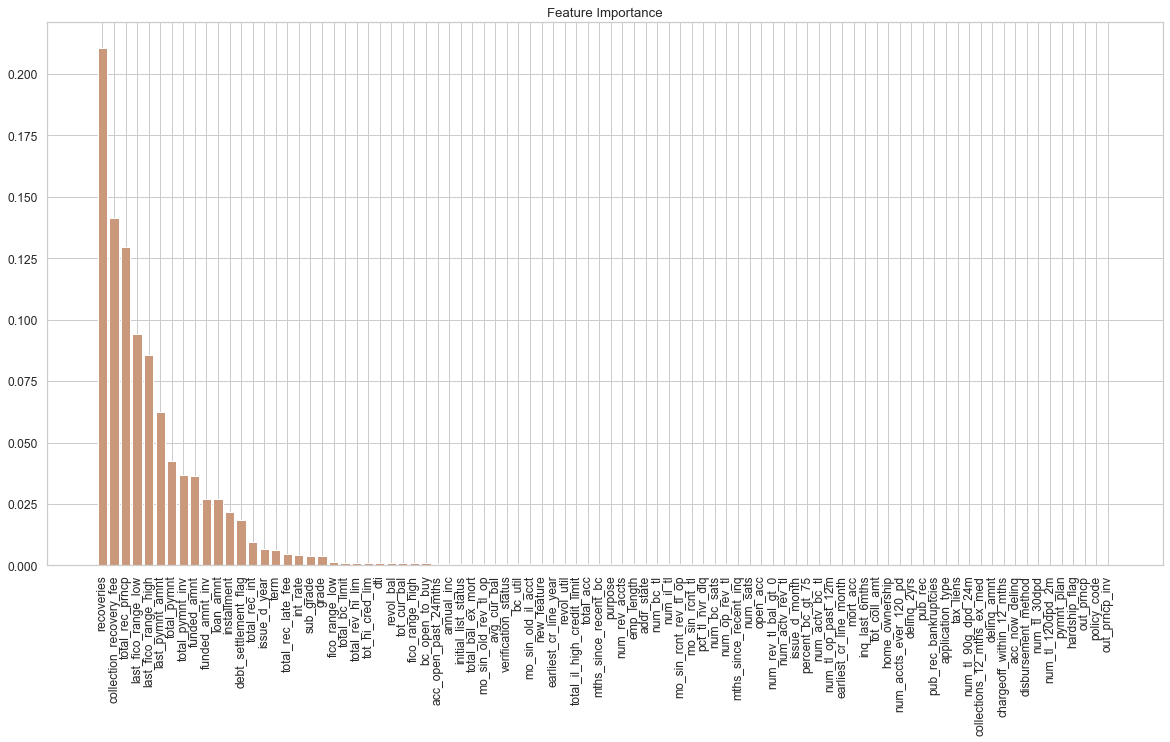

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices],rotation=90)
#plt.tight_layout()
plt.show()

In [88]:
rf_model.feature_names_in_

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',


In [89]:
names = []
values = []
for f in range(x_train.shape[1]):
    names.append(feat_labels[sorted_indices[f]])
    values.append(importances[sorted_indices[f]])


In [90]:
importance = pd.DataFrame({ "Features":names,
                            "Importance":values  })

importance

,Features,Importance
0,recoveries,0.210710
1,collection_recovery_fee,0.141536
2,total_rec_prncp,0.129777
3,last_fico_range_low,0.094094
4,last_fico_range_high,0.085459
...,...,...
83,pymnt_plan,0.000000
84,hardship_flag,0.000000
85,out_prncp,0.000000
86,policy_code,0.000000


### Dropping less important features

In [91]:
# Setting the threshold 
thr = importance[importance["Features"]=="new_feature"]["Importance"]
thr

38    0.000546
Name: Importance, dtype: float64

In [94]:
features_to_drop = list(importance.loc[importance["Importance"]<= 0.000546,"Features"])
features_to_drop

['earliest_cr_line_year',
 'revol_util',
 'total_il_high_credit_limit',
 'total_acc',
 'mths_since_recent_bc',
 'purpose',
 'num_rev_accts',
 'emp_length',
 'addr_state',
 'num_bc_tl',
 'num_il_tl',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'pct_tl_nvr_dlq',
 'num_bc_sats',
 'num_op_rev_tl',
 'mths_since_recent_inq',
 'num_sats',
 'open_acc',
 'num_rev_tl_bal_gt_0',
 'num_actv_rev_tl',
 'issue_d_month',
 'percent_bc_gt_75',
 'num_actv_bc_tl',
 'num_tl_op_past_12m',
 'earliest_cr_line_month',
 'mort_acc',
 'inq_last_6mths',
 'tot_coll_amt',
 'home_ownership',
 'num_accts_ever_120_pd',
 'delinq_2yrs',
 'pub_rec',
 'pub_rec_bankruptcies',
 'application_type',
 'tax_liens',
 'num_tl_90g_dpd_24m',
 'collections_12_mths_ex_med',
 'delinq_amnt',
 'chargeoff_within_12_mths',
 'acc_now_delinq',
 'disbursement_method',
 'num_tl_30dpd',
 'num_tl_120dpd_2m',
 'pymnt_plan',
 'hardship_flag',
 'out_prncp',
 'policy_code',
 'out_prncp_inv']

In [95]:
for f in features_to_drop:
    norm_df.drop(columns=f,axis=1,inplace=True)
    
norm_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,dti,fico_range_low,fico_range_high,revol_bal,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,debt_settlement_flag,issue_d_year
0,0.078481,0.078481,0.09000,0.0,0.338006,0.068867,0.333333,0.382353,0.005000,0.0,0.00691,0.227273,0.226244,0.000952,1.0,0.069857,0.069857,0.09000,0.029147,4.289932e-12,0.0,0.0,0.002907,0.663529,0.662722,0.018113,0.00093,0.06250,0.021607,0.002690,0.109541,0.148235,0.017805,0.002273,0.002171,0.0,0.727273
1,0.612658,0.612658,0.61750,0.0,0.260125,0.475450,0.333333,0.294118,0.005910,0.0,0.01706,0.409091,0.407240,0.007391,1.0,0.405702,0.405702,0.61750,0.034749,4.289932e-12,0.0,0.0,0.021956,0.822353,0.822485,0.025549,0.01118,0.06250,0.010159,0.103284,0.079800,0.223529,0.031402,0.011583,0.071732,0.0,0.727273
2,0.493671,0.493671,0.50000,1.0,0.213006,0.249420,0.166667,0.235294,0.005728,0.0,0.01178,0.318182,0.316742,0.002709,1.0,0.358721,0.358721,0.50000,0.095980,4.289932e-12,0.0,0.0,0.374793,0.828235,0.828402,0.023712,0.00140,0.09375,0.033000,0.004888,0.164605,0.214118,0.021842,0.005486,0.005608,0.0,0.727273
3,0.250633,0.250633,0.26000,1.0,0.667445,0.166179,0.833333,0.735294,0.009495,0.5,0.02637,0.318182,0.316742,0.007549,1.0,0.185483,0.185483,0.26000,0.047548,4.289932e-12,0.0,0.0,0.240068,0.828235,0.828402,0.041466,0.00340,0.15625,0.028853,0.008157,0.228210,0.244706,0.043957,0.028100,0.018363,0.0,0.727273
4,0.289873,0.289873,0.29875,0.0,0.316589,0.233396,0.333333,0.352941,0.003091,0.5,0.01120,0.295455,0.294118,0.003037,1.0,0.216582,0.216582,0.29875,0.062391,4.289932e-12,0.0,0.0,0.181398,0.892941,0.893491,0.001600,0.00129,0.00000,0.002672,0.001507,0.267962,0.061176,0.001690,0.003755,0.008503,0.0,0.727273


In [96]:
# Final normal dataframe with less number of features
norm_df.shape

(1345310, 37)

In [97]:
y.shape

(1345310,)

In [98]:
final_df = pd.concat([norm_df,y],axis=1)
final_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,dti,fico_range_low,fico_range_high,revol_bal,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,debt_settlement_flag,issue_d_year,loan_sts
0,0.078481,0.078481,0.09000,0.0,0.338006,0.068867,0.333333,0.382353,0.005000,0.0,0.00691,0.227273,0.226244,0.000952,1.0,0.069857,0.069857,0.090000,0.029147,4.289932e-12,0.0,0.0,0.002907,0.663529,0.662722,0.018113,0.00093,0.062500,0.021607,0.002690,0.109541,0.148235,0.017805,0.002273,0.002171,0.0,0.727273,1
1,0.612658,0.612658,0.61750,0.0,0.260125,0.475450,0.333333,0.294118,0.005910,0.0,0.01706,0.409091,0.407240,0.007391,1.0,0.405702,0.405702,0.617500,0.034749,4.289932e-12,0.0,0.0,0.021956,0.822353,0.822485,0.025549,0.01118,0.062500,0.010159,0.103284,0.079800,0.223529,0.031402,0.011583,0.071732,0.0,0.727273,1
2,0.493671,0.493671,0.50000,1.0,0.213006,0.249420,0.166667,0.235294,0.005728,0.0,0.01178,0.318182,0.316742,0.002709,1.0,0.358721,0.358721,0.500000,0.095980,4.289932e-12,0.0,0.0,0.374793,0.828235,0.828402,0.023712,0.00140,0.093750,0.033000,0.004888,0.164605,0.214118,0.021842,0.005486,0.005608,0.0,0.727273,1
3,0.250633,0.250633,0.26000,1.0,0.667445,0.166179,0.833333,0.735294,0.009495,0.5,0.02637,0.318182,0.316742,0.007549,1.0,0.185483,0.185483,0.260000,0.047548,4.289932e-12,0.0,0.0,0.240068,0.828235,0.828402,0.041466,0.00340,0.156250,0.028853,0.008157,0.228210,0.244706,0.043957,0.028100,0.018363,0.0,0.727273,1
4,0.289873,0.289873,0.29875,0.0,0.316589,0.233396,0.333333,0.352941,0.003091,0.5,0.01120,0.295455,0.294118,0.003037,1.0,0.216582,0.216582,0.298750,0.062391,4.289932e-12,0.0,0.0,0.181398,0.892941,0.893491,0.001600,0.00129,0.000000,0.002672,0.001507,0.267962,0.061176,0.001690,0.003755,0.008503,0.0,0.727273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,0.443038,0.443038,0.45000,1.0,0.162773,0.217517,0.166667,0.176471,0.011819,0.0,0.02159,0.500000,0.497738,0.008205,0.0,0.327919,0.327919,0.450000,0.097765,4.289932e-12,0.0,0.0,0.304057,0.834118,0.834320,0.021095,0.00701,0.093750,0.010361,0.007432,0.200824,0.169412,0.027536,0.015947,0.011850,0.0,0.818182,1
1345306,0.731646,0.731646,0.73500,1.0,0.338006,0.395947,0.333333,0.352941,0.016437,0.0,0.02303,0.363636,0.361991,0.026673,0.0,0.566359,0.566359,0.735000,0.228740,4.289932e-12,0.0,0.0,0.525995,0.845882,0.846154,0.082932,0.00865,0.062500,0.046166,0.015051,0.204358,0.202353,0.071906,0.043516,0.051108,0.0,0.818182,1
1345307,0.797468,0.797468,0.80000,1.0,0.357477,0.436066,0.333333,0.382353,0.014274,0.5,0.01134,0.500000,0.497738,0.038418,0.0,0.059054,0.059054,0.046912,0.066027,4.289932e-12,0.0,0.0,0.017841,0.587059,0.000000,0.051087,0.02075,0.156250,0.030470,0.025215,0.031213,0.071765,0.052438,0.036053,0.014292,0.0,0.818182,0
1345308,0.392405,0.392405,0.40000,1.0,0.291277,0.208414,0.333333,0.294118,0.013637,0.0,0.01325,0.181818,0.180995,0.002651,0.0,0.294811,0.294811,0.400000,0.094373,4.289932e-12,0.0,0.0,0.305141,0.804706,0.804734,0.008225,0.00140,0.140625,0.006244,0.004858,0.215253,0.267059,0.008747,0.019306,0.009136,0.0,0.818182,1


In [99]:
# Spliting into training and testing
x_train,x_test,y_train,y_test = train_test_split(final_df.iloc[:,:-1],final_df.iloc[:,-1],test_size=0.3,random_state=0)

In [100]:
print(x_train.shape,y_train.shape)

(941717, 37) (941717,)


In [101]:
print(x_test.shape,y_test.shape)

(403593, 37) (403593,)


### Creating the Neural Network

In [105]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.layers.core import Dropout

# fix random seed for reproducibility
seed=7
np.random.seed(seed)

In [110]:
# Input layer will contain 38 neurons since there are 38 features

model = tf.keras.models.Sequential()

# layer 1
model.add(Dense(512,input_dim=37,activation="relu",kernel_initializer="uniform"))

# Layer 2
model.add(Dense(256,activation="relu",kernel_initializer="uniform"))

# Layer 3
model.add(Dense(128,activation="relu",kernel_initializer="uniform"))

# Layer 4
model.add(Dense(64,activation="relu",kernel_initializer="uniform"))

# Layers 5
model.add(Dense(32,activation="relu",kernel_initializer="uniform"))

# Output Layer
model.add(Dense(1,activation="sigmoid"))

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               19456     
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 194,049
Trainable params: 194,049
Non-tr

In [112]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10, batch_size=512,
                   callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', patience=50, restore_best_weights=True)])

Epoch 1/10
1840/1840 [==============================] - 18s 9ms/step - loss: 0.0277 - accuracy: 0.9905 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 2/10
1840/1840 [==============================] - 18s 10ms/step - loss: 0.0083 - accuracy: 0.9980 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 3/10
1840/1840 [==============================] - 20s 11ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 4/10
1840/1840 [==============================] - 20s 11ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 5/10
1840/1840 [==============================] - 20s 11ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 6/10
1840/1840 [==============================] - 20s 11ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 7/10
1840/1840 [==============================] - 20s 11ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0054 - 

Train: 0.999, Test: 0.999


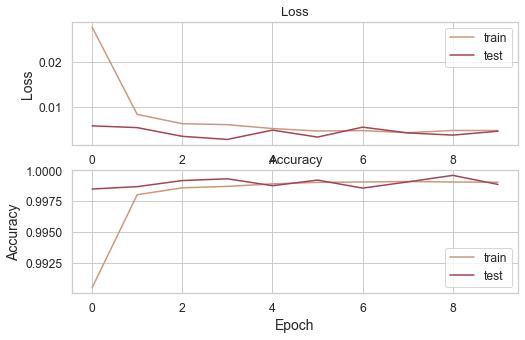

In [133]:
# evaluate the model
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_train, y_train, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

import matplotlib.pyplot as plt
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch',size=14)
plt.ylabel('Loss',size=14)
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch',size=14)
plt.ylabel('Accuracy',size=14)
plt.legend()
plt.show()

In [114]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(model.predict(x_test),axis=1)

12613/12613 [==============================] - 18s 1ms/step


In [115]:
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
# Setting up the threshhold (the distribution of actual data is 80-20)
thr=np.quantile(yhat_probs,0.2) 

In [117]:
# Classification Report of test data  
print(classification_report(y_test,(yhat_probs)>thr))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     80067
           1       1.00      1.00      1.00    323526

    accuracy                           1.00    403593
   macro avg       1.00      1.00      1.00    403593
weighted avg       1.00      1.00      1.00    403593



In [118]:
yhat_probs

array([[0.99952096],
       [0.9996825 ],
       [0.9991147 ],
       ...,
       [0.9998034 ],
       [0.99960625],
       [0.        ]], dtype=float32)

In [119]:
yhat_probs.mean()

0.8023132

In [120]:
yhat_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
yhat_classes.mean()

0.0

In [131]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, (yhat_probs)>thr)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, (yhat_probs)>thr)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, (yhat_probs)>thr)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, (yhat_probs)>thr)
print('F1 score: %f' % f1)

final_results = pd.DataFrame( {"parameters": ["Accuracy", "Precision", "Recall", "F1 score"],
                              "values": [accuracy,precision,recall,f1]})
final_results

Accuracy: 0.997790
Precision: 0.999628
Recall: 0.997614
F1 score: 0.998620


,parameters,values
0,Accuracy,0.997790
1,Precision,0.999628
2,Recall,0.997614
3,F1 score,0.998620


### ROC-AUC 

In [126]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

12613/12613 [==============================] - 18s 1ms/step


In [127]:
# AUC Score
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9999205267189526

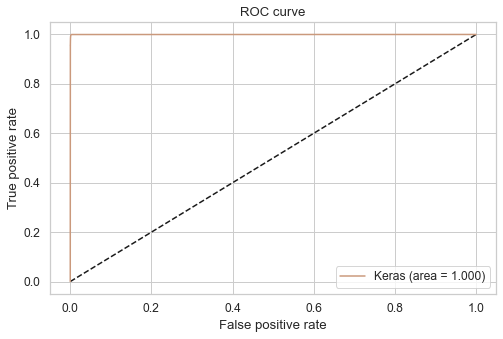

In [128]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()